In [17]:
%matplotlib inline


# Packed-bubble chart

Create a packed-bubble chart to represent scalar data.
The presented algorithm tries to move all bubbles as close to the center of
mass as possible while avoiding some collisions by moving around colliding
objects. In this example we plot the market share of different desktop
browsers.
(source: https://gs.statcounter.com/browser-market-share/desktop/worldwidev)


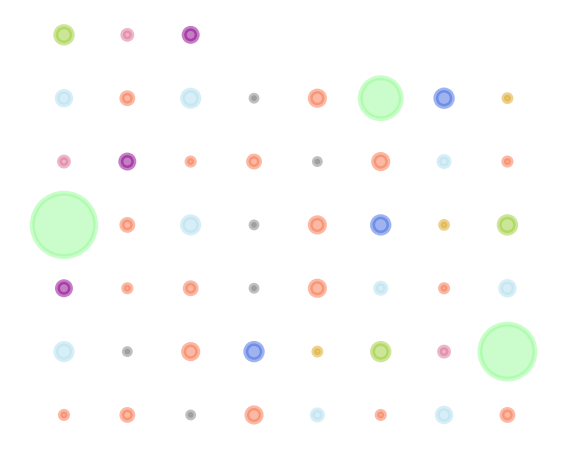

[469.79069953 373.66379645]
[459.54875372 380.32671507]
[469.8668657  377.51594803]


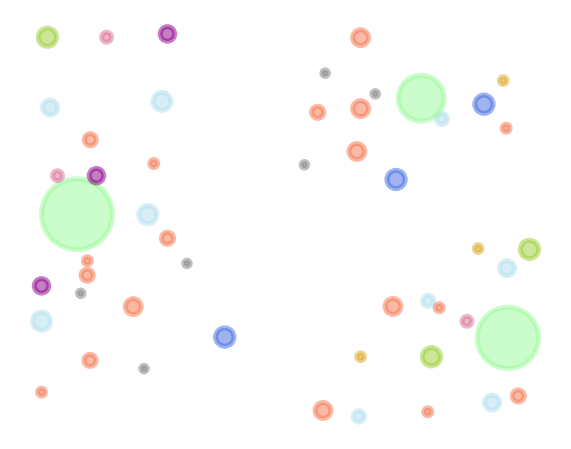

[481.86007253 367.91090193]
[486.85590855 379.31568601]
[486.92044404 377.19939442]


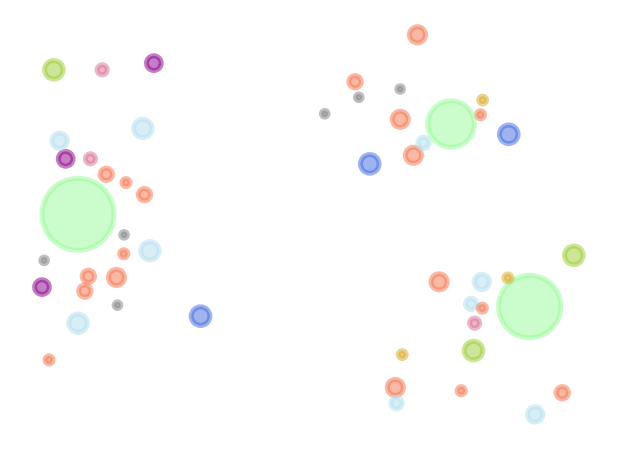

[494.60704087 365.16544006]
[494.93919717 365.40045391]
[494.97763238 365.42863503]


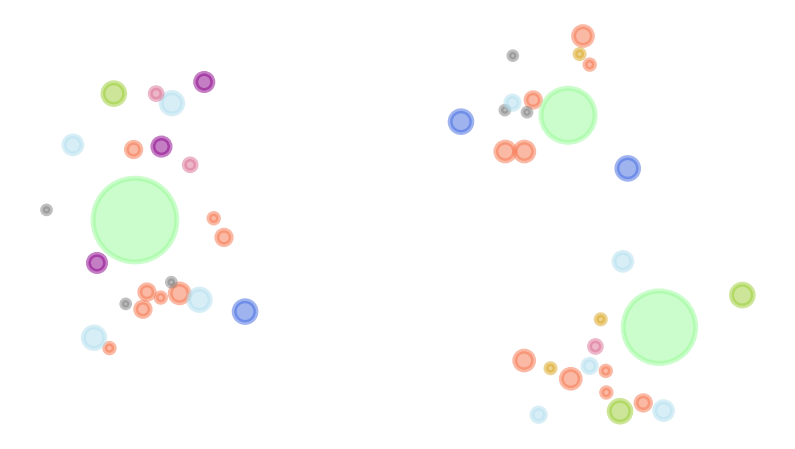

[494.23939573 360.95514404]
[496.68567849 374.48697473]
[498.6200949  377.63985616]


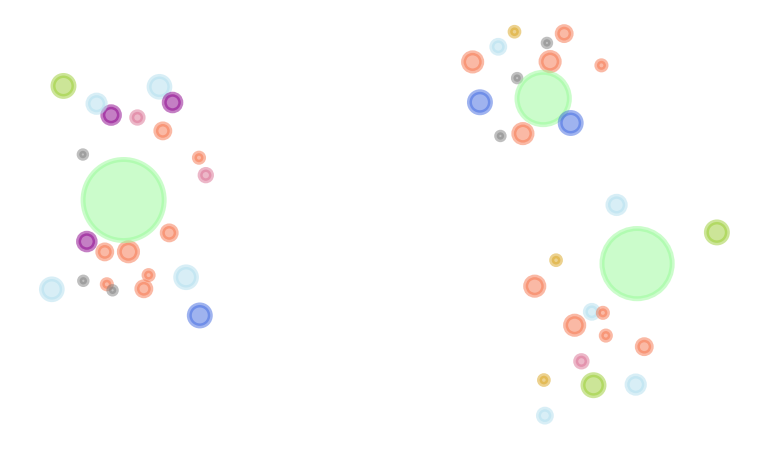

[496.88515922 380.73353289]
[497.28601918 380.61743149]
[510.094484   380.76529797]


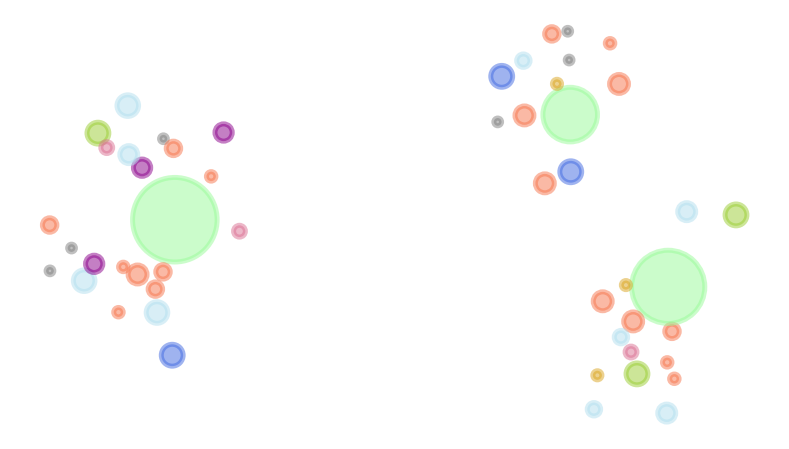

[513.51097068 380.0501609 ]
[513.46506629 381.32718771]
[513.44526359 378.87284811]


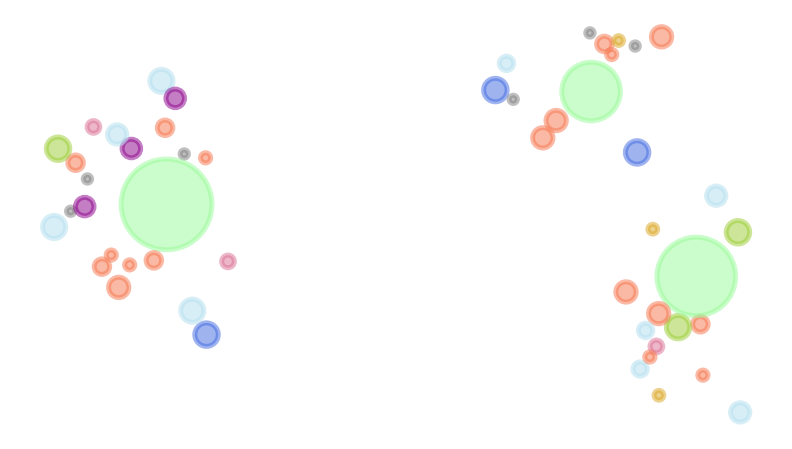

[514.56573415 380.2637801 ]
[514.97989293 380.47168431]
[514.36023931 378.46914643]


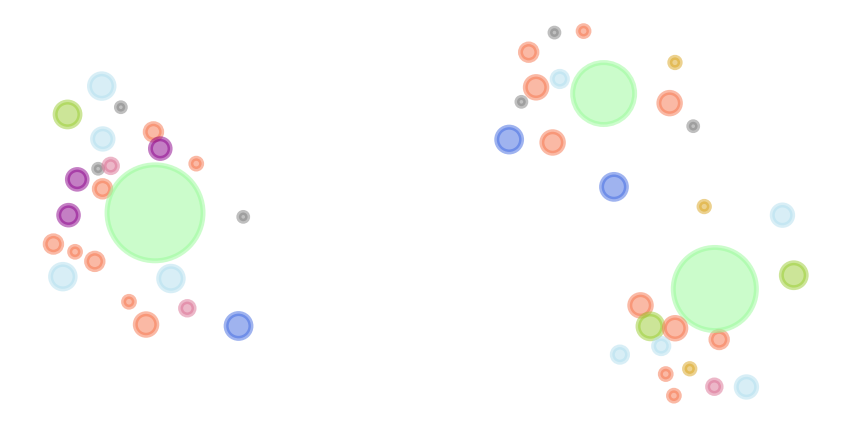

[515.07228765 379.25122842]
[514.59544218 378.9733177 ]
[516.44614778 378.83474996]


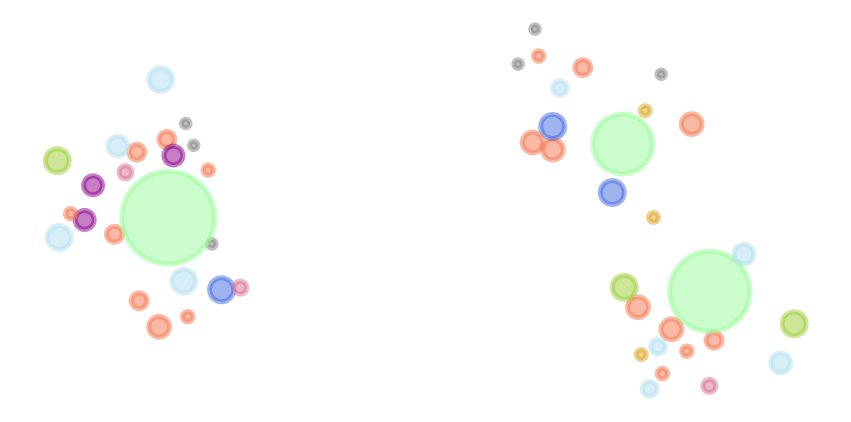

[518.48376918 369.39898582]
[519.15737302 367.97912998]
[517.63719841 367.87579094]


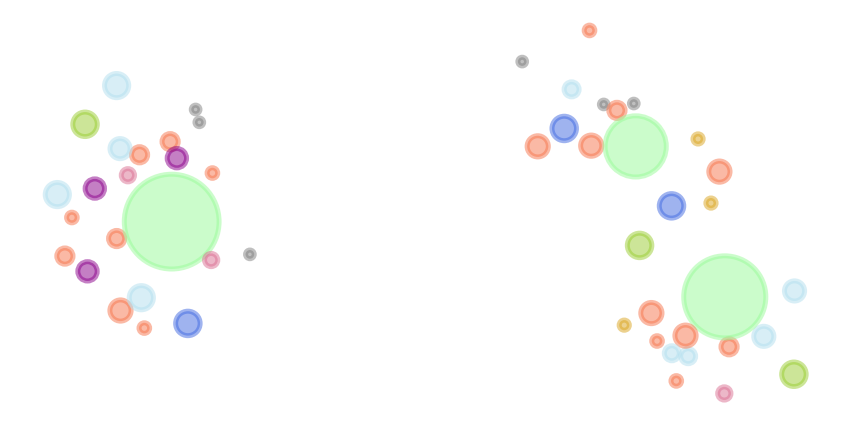

[519.67965559 367.45344989]
[517.27252407 379.19584291]
[517.72098139 379.36282114]


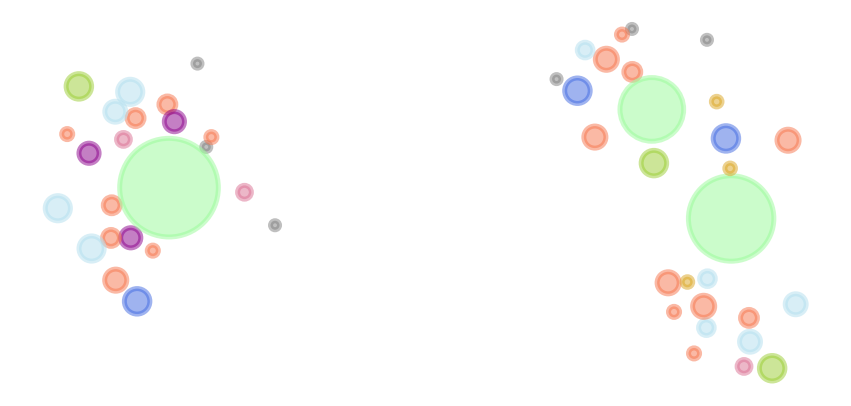

[521.11548259 382.53363937]
[521.22310481 382.6302193 ]
[520.88154791 382.87196379]


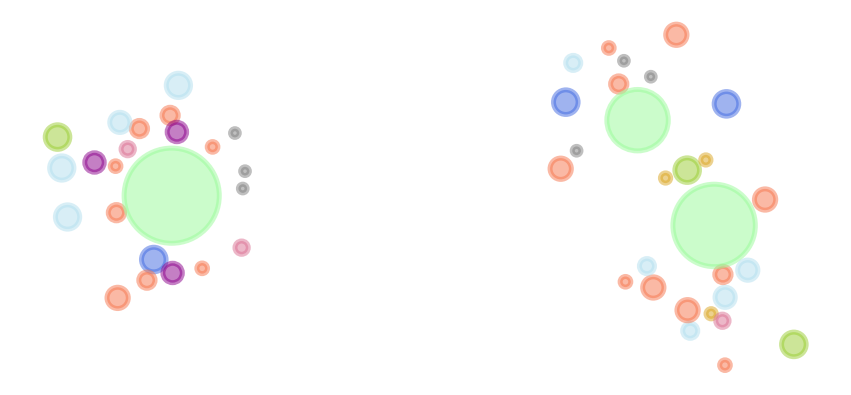

[519.31350249 383.38010617]
[520.3263704  383.61040662]
[517.67943428 383.42615997]


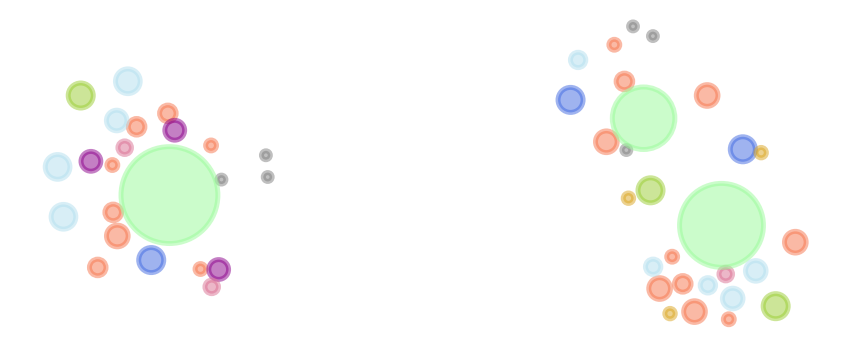

[518.32045391 383.95506803]
[512.06733622 394.8451907 ]
[511.1775051  395.41176654]


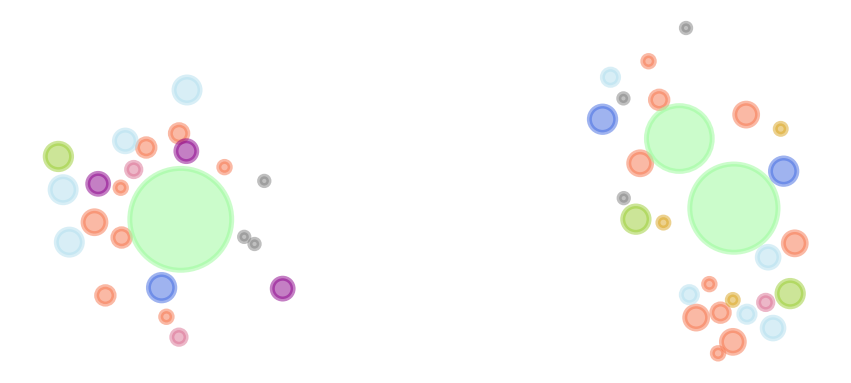

[511.43545318 396.91753629]
[512.48415118 397.22177341]
[511.68484597 397.95783602]


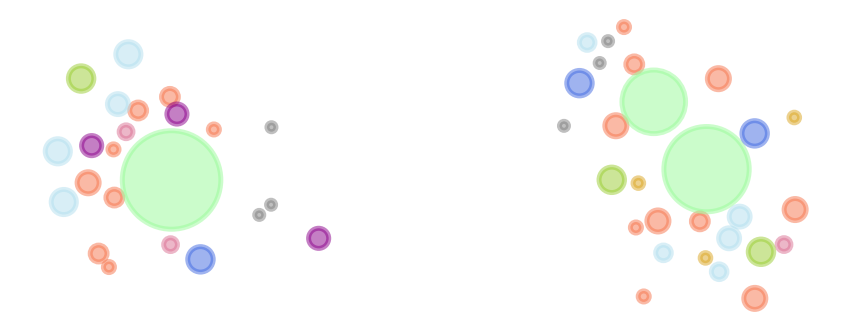

[512.35320561 398.91844726]
[513.57441777 399.27562205]
[513.09293468 399.28475372]


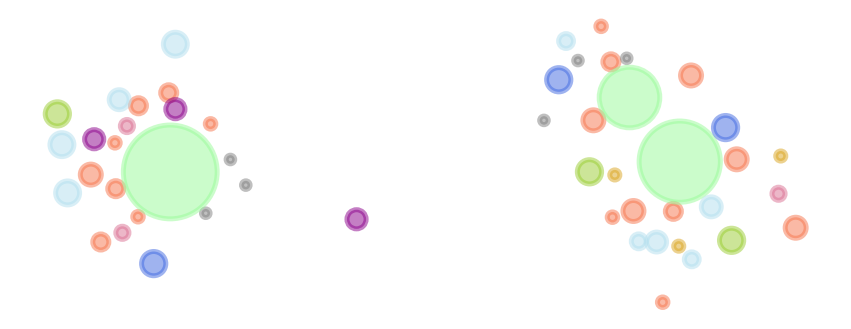

[511.35868003 398.50977758]
[512.21178267 398.91624059]
[522.13103578 389.17175678]


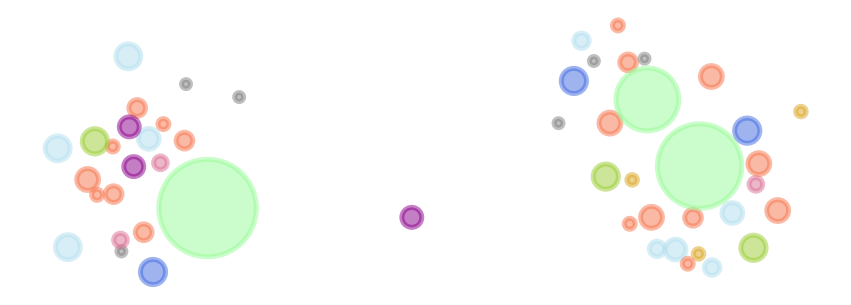

[524.60749309 388.67210318]
[525.7834231  388.68289235]
[535.46113875 376.80770943]


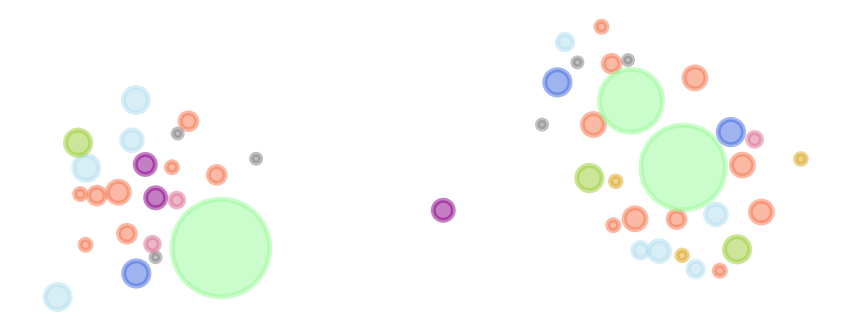

[538.50129491 372.11770311]
[539.50501141 372.51163707]
[550.98553556 361.14635153]


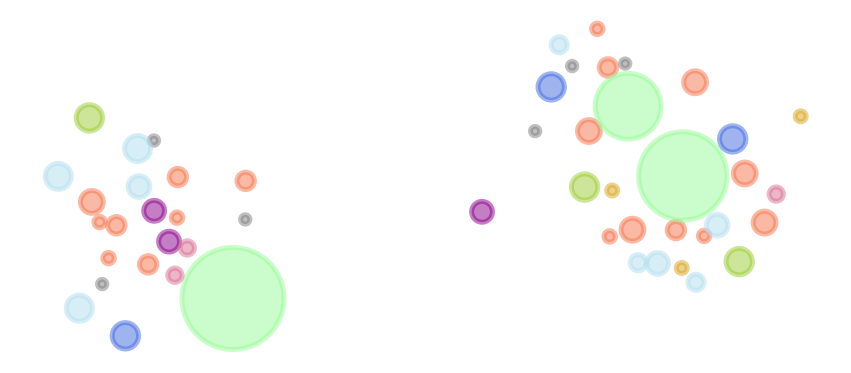

[552.72876717 360.37210697]
[553.88089876 360.42134579]
[567.44828626 363.87086035]


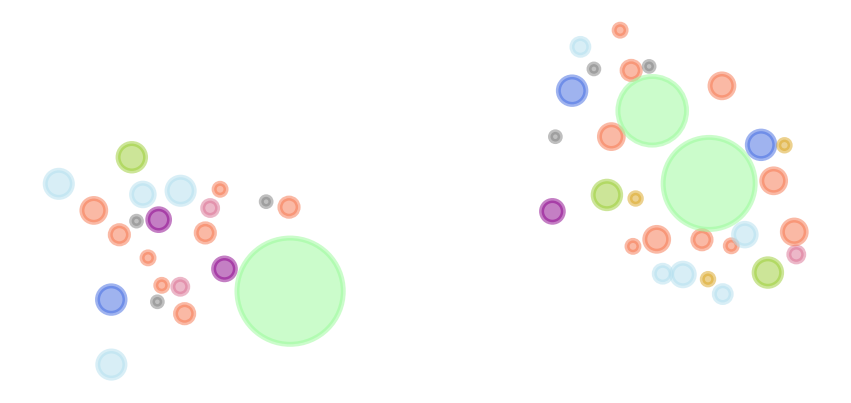

[568.89102617 363.95619684]
[569.32854331 362.75495845]
[583.20257413 366.60903182]


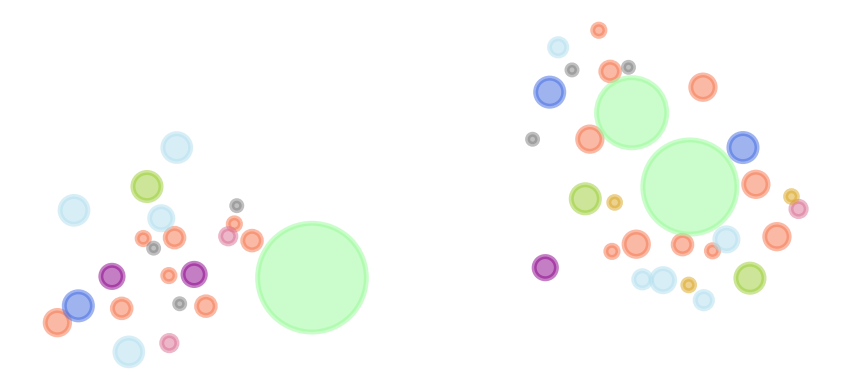

[586.63059412 363.54645997]
[587.94587654 363.98127989]
[601.19528499 367.97328842]


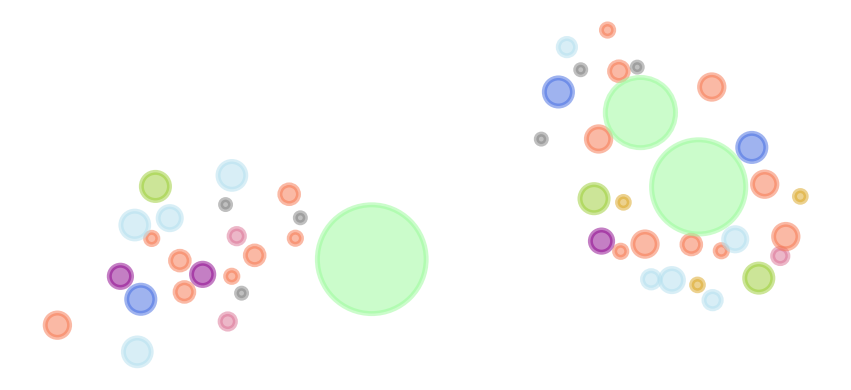

[602.89480651 368.54082446]
[603.10251745 368.68585966]
[618.48364275 373.86019133]


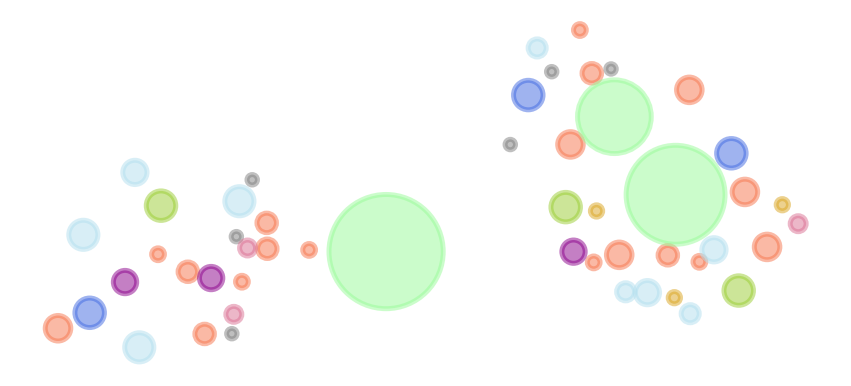

[623.89443334 373.32618465]
[624.1409829  373.49453237]
[640.13476046 377.80952776]


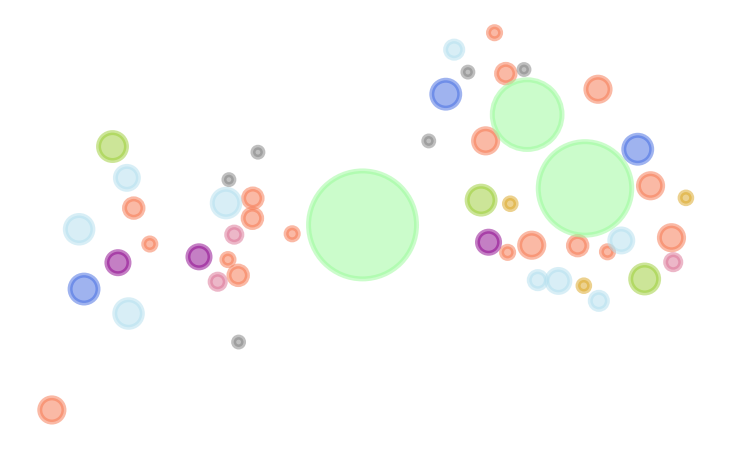

[645.10245336 380.59659446]
[645.29616147 380.54284472]
[648.70112739 380.68918477]


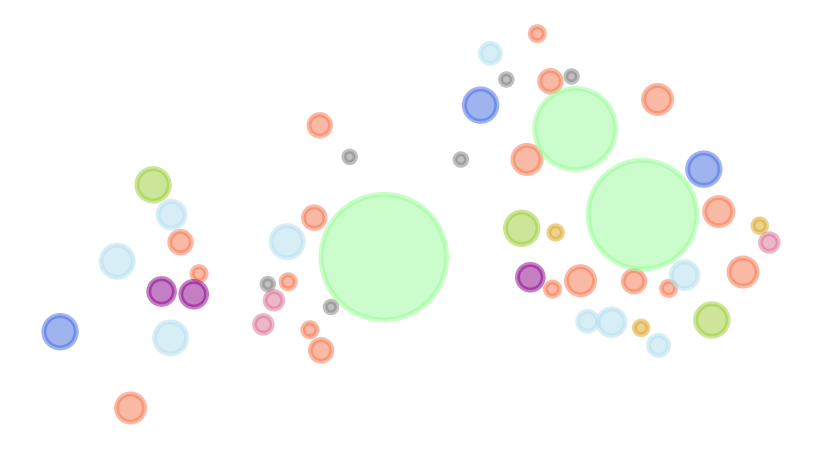

[653.30365501 379.2369897 ]
[653.48177488 378.84515495]
[654.52447511 380.07398253]


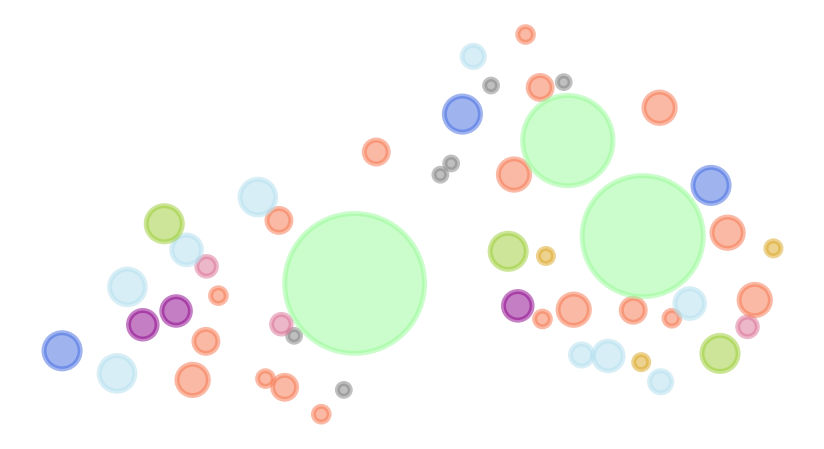

[658.5749139  380.83674524]
[658.5749139  380.83674524]
[660.31986091 382.44963244]


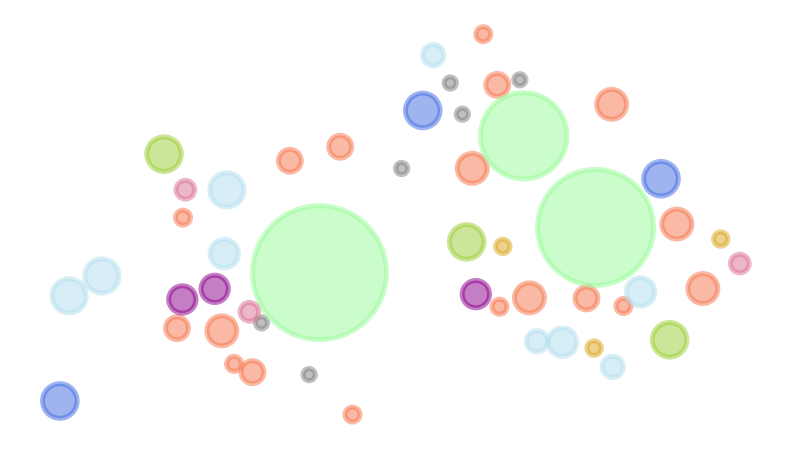

[662.23693672 385.31701425]
[662.50067248 384.916575  ]
[669.82477697 386.39273533]


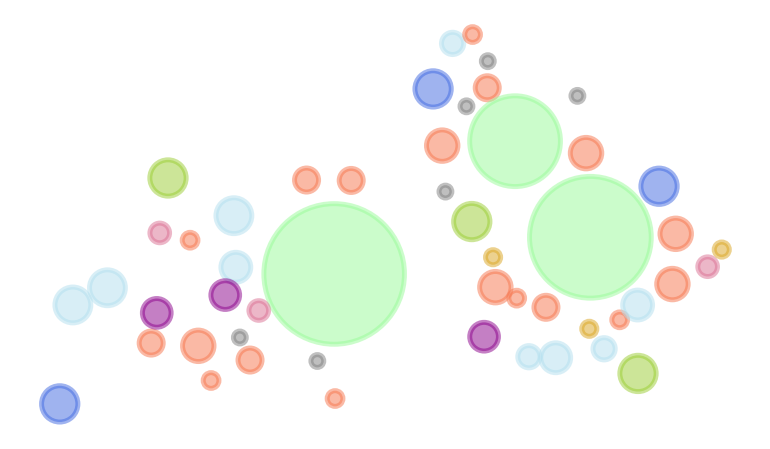

[671.5000707  387.19851859]
[671.71403397 387.14744808]
[678.94959627 383.12093957]


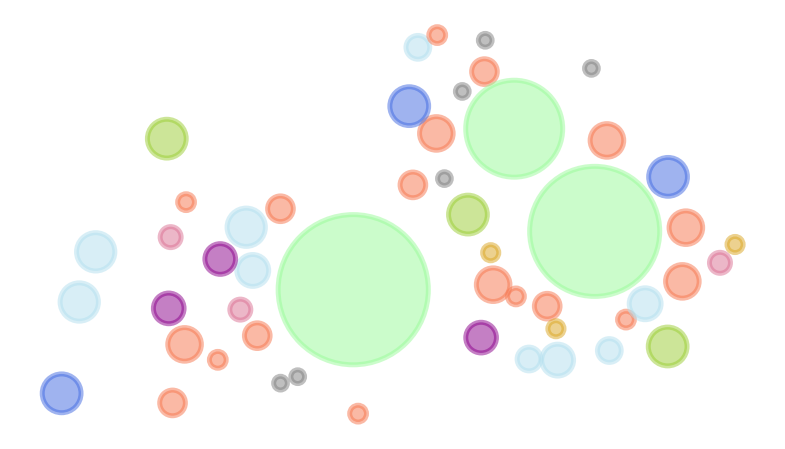

[680.67123568 384.5917312 ]
[680.87630085 385.08743987]
[682.85845006 392.19627038]


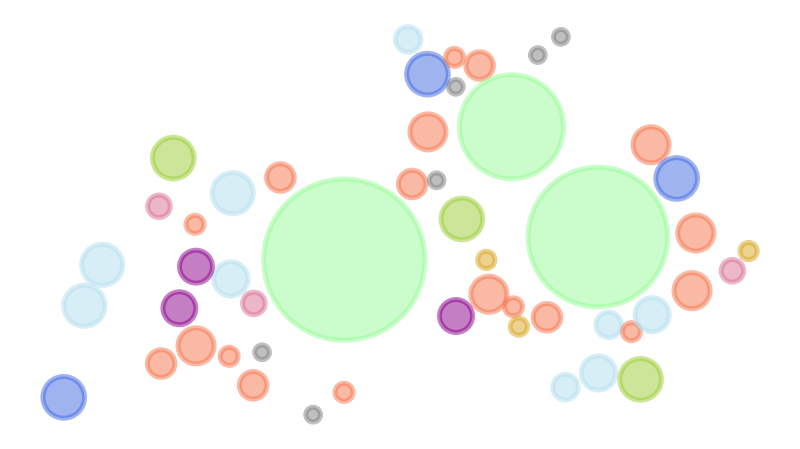

[684.90350032 392.57766872]
[685.38050058 392.56658925]
[691.76594852 388.94621293]


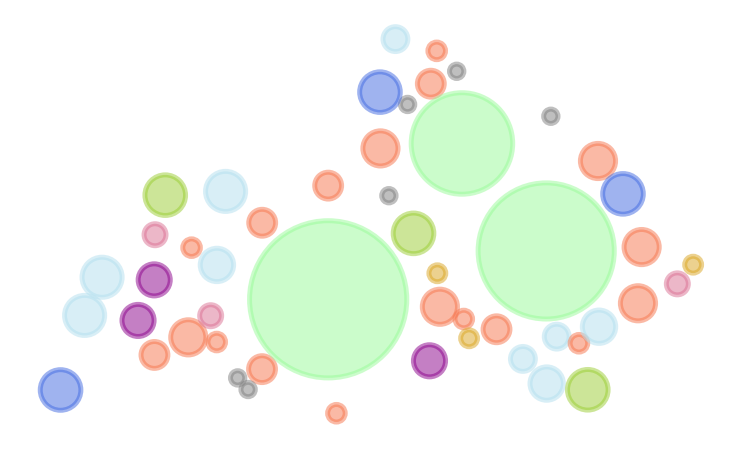

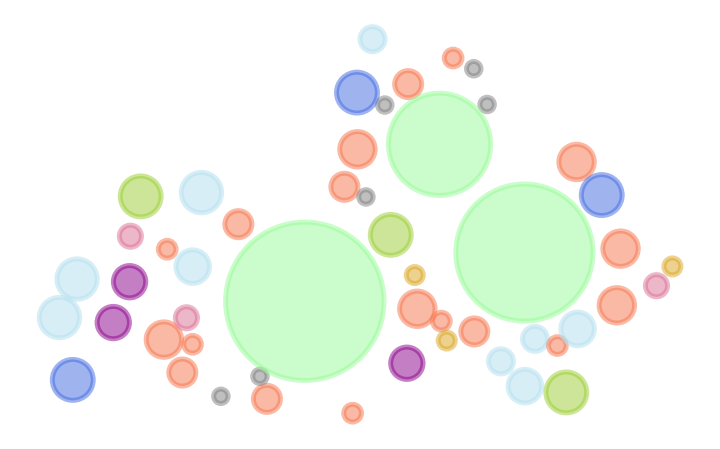

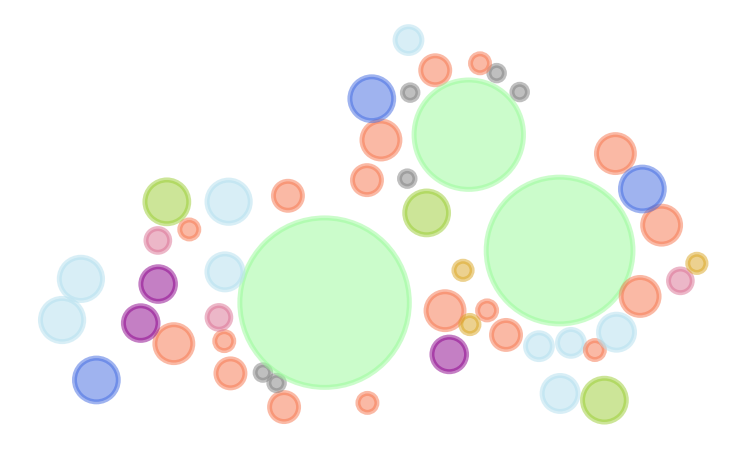

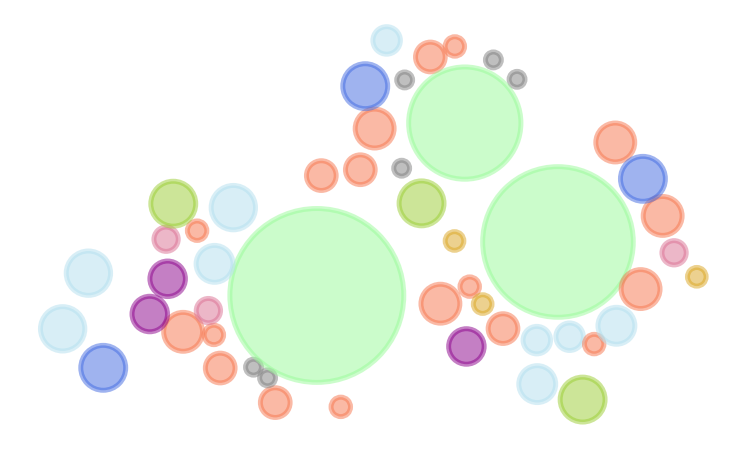

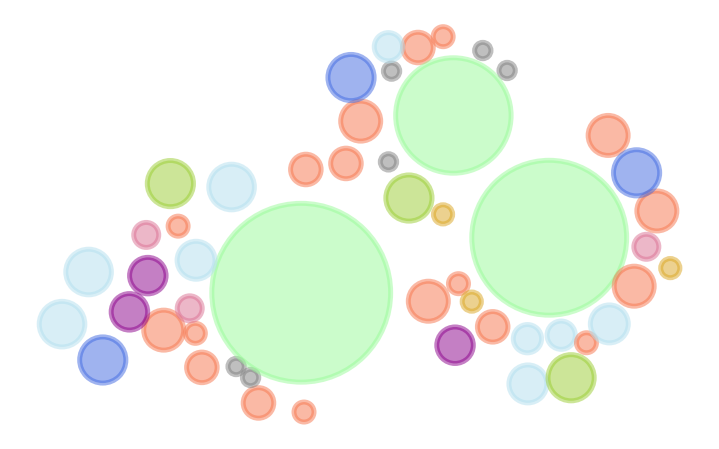

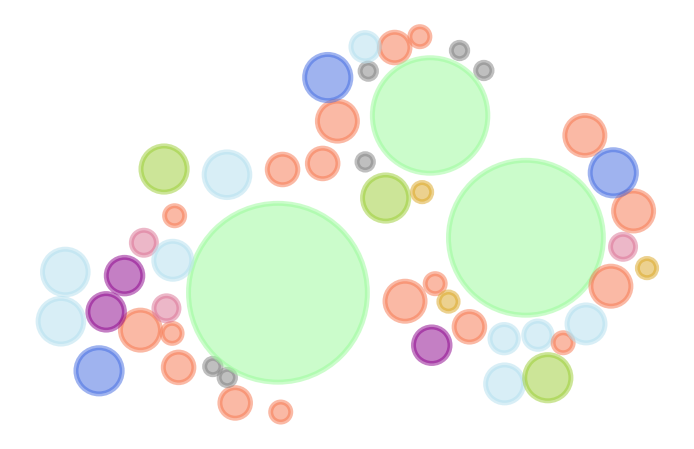

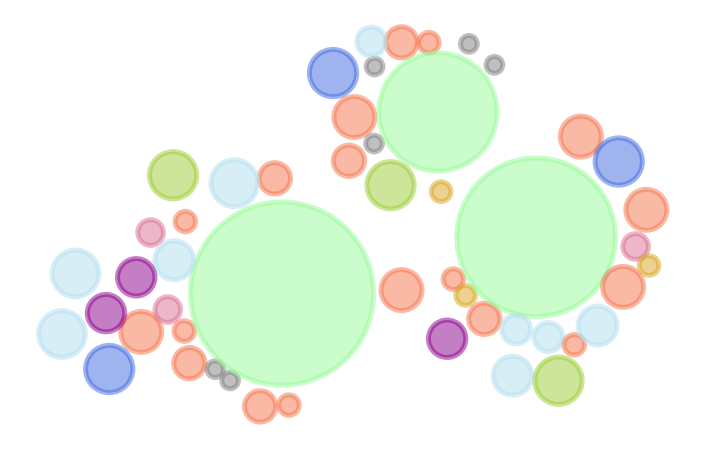

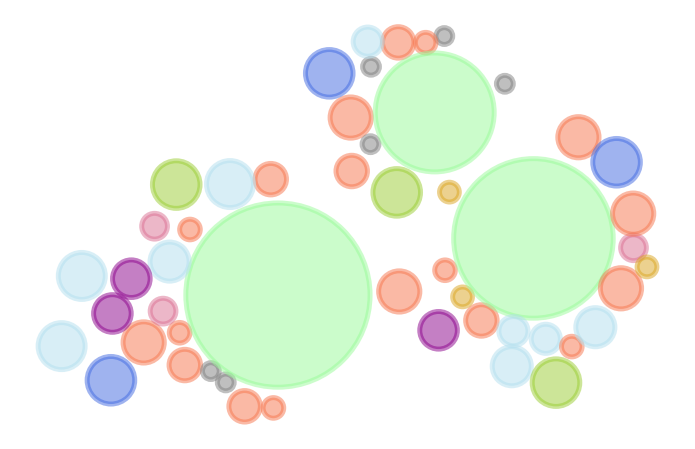

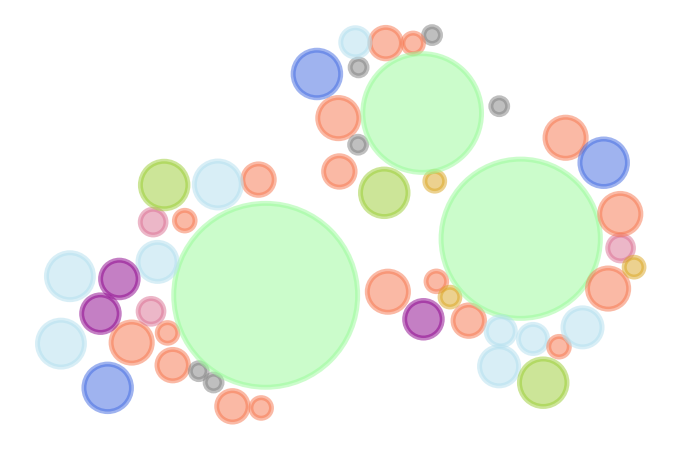

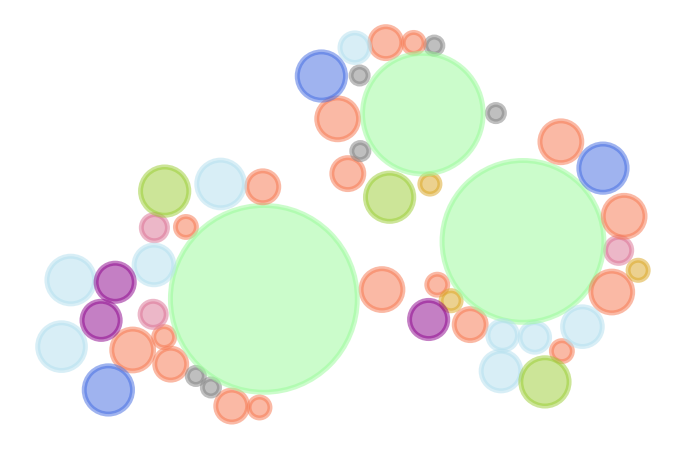

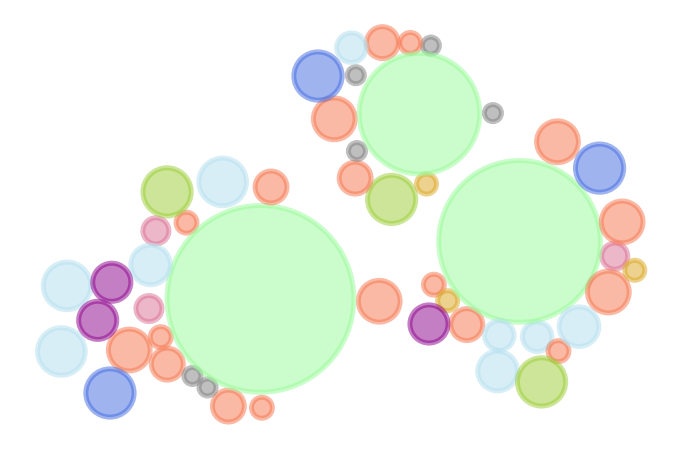

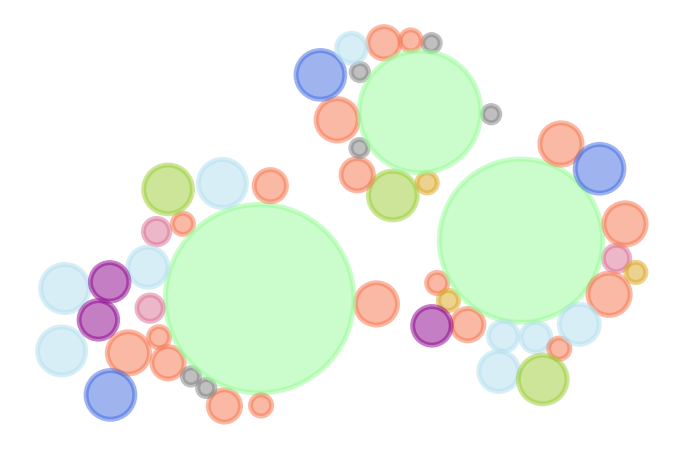

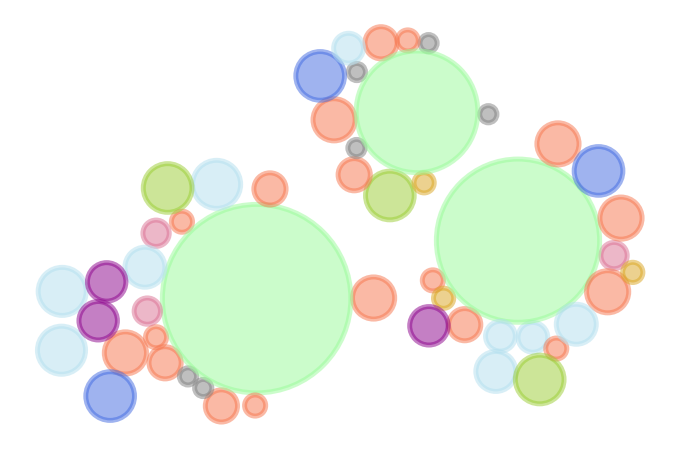

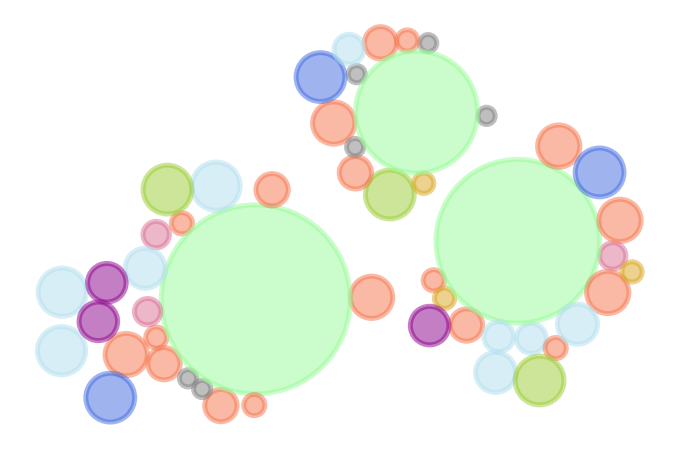

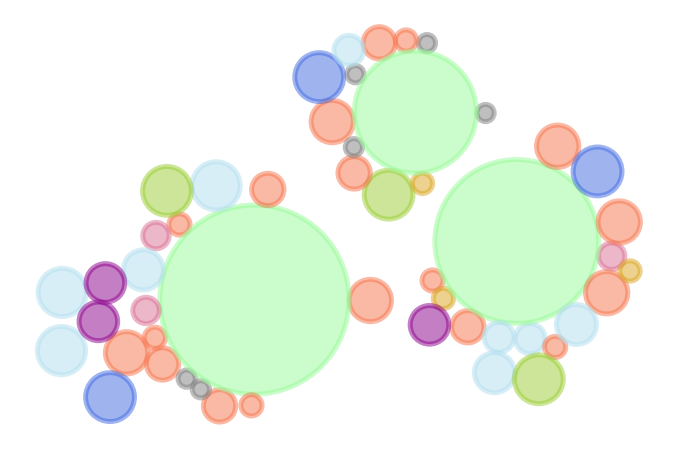

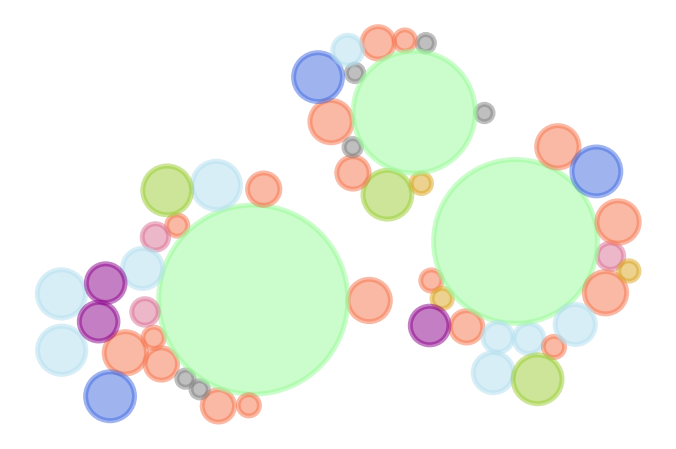

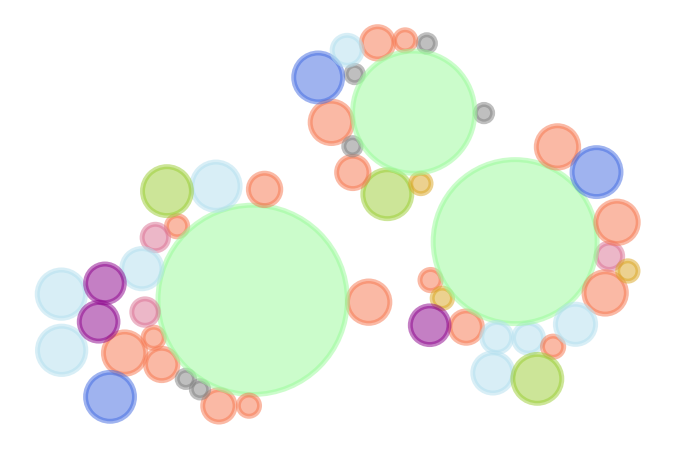

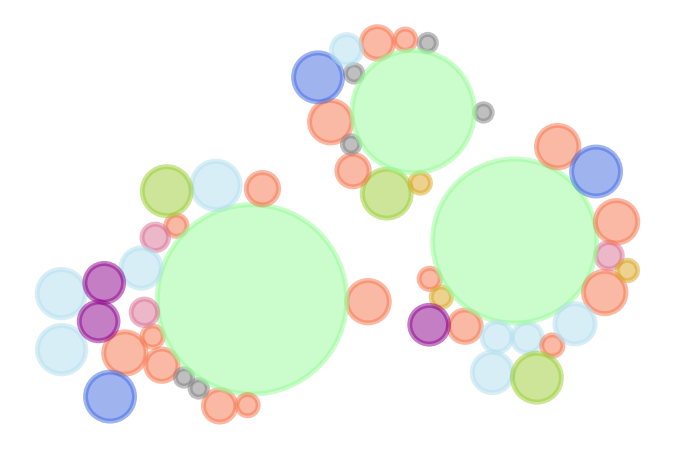

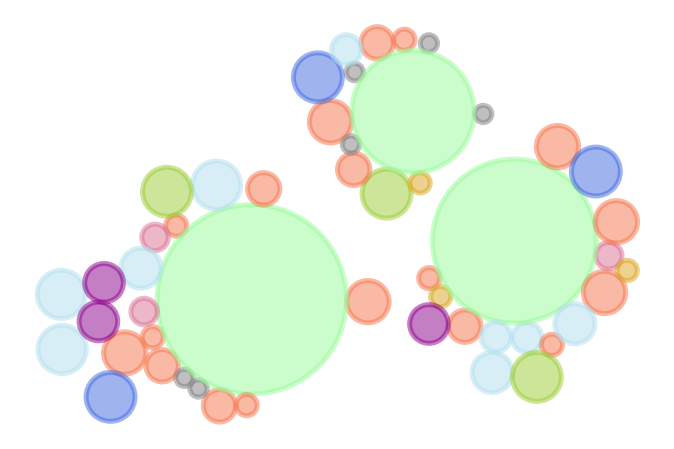

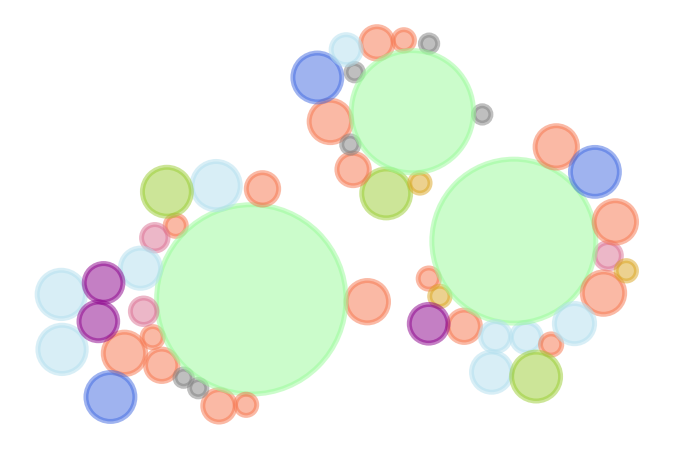

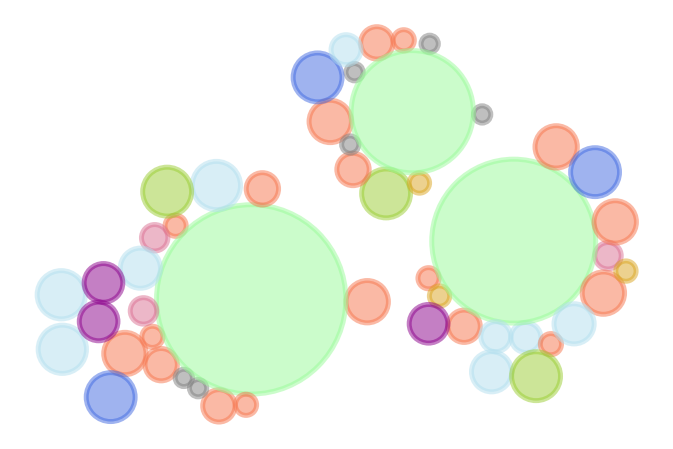

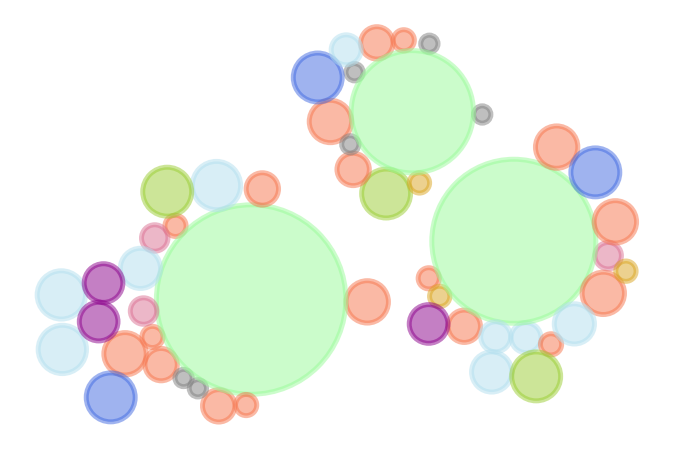

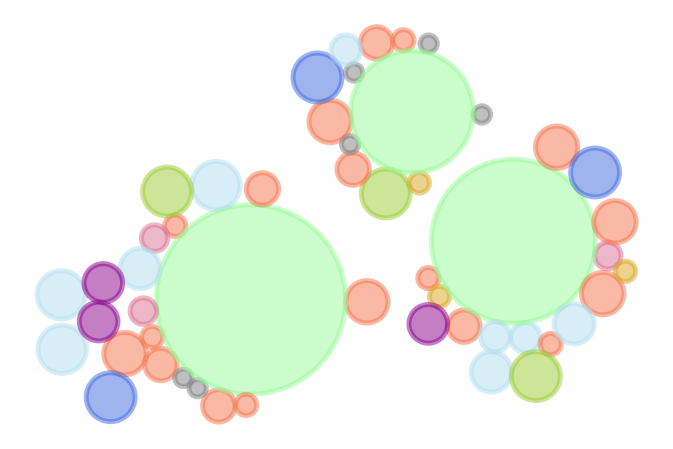

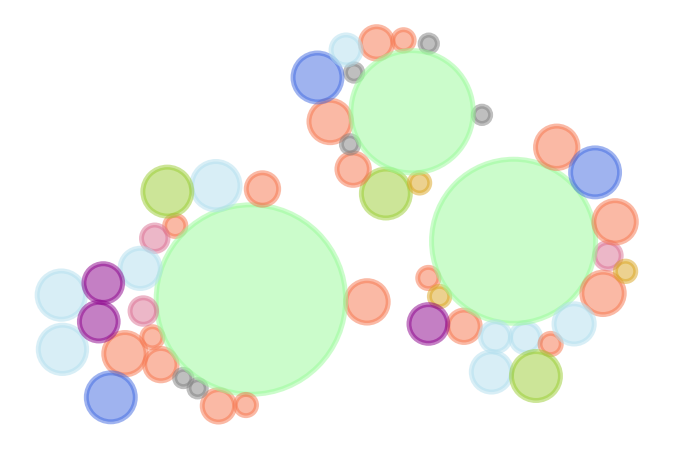

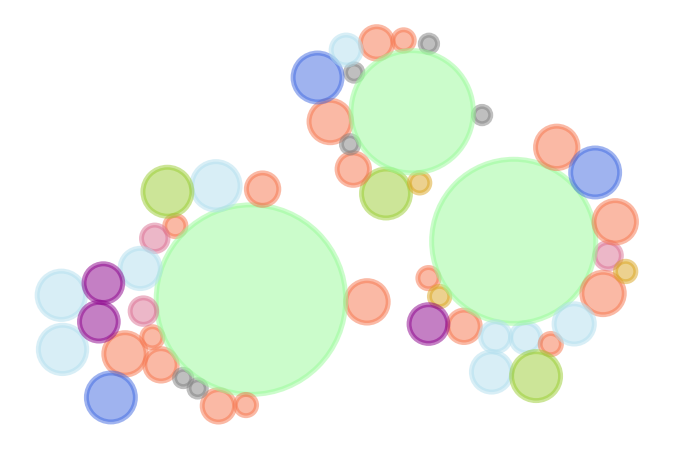

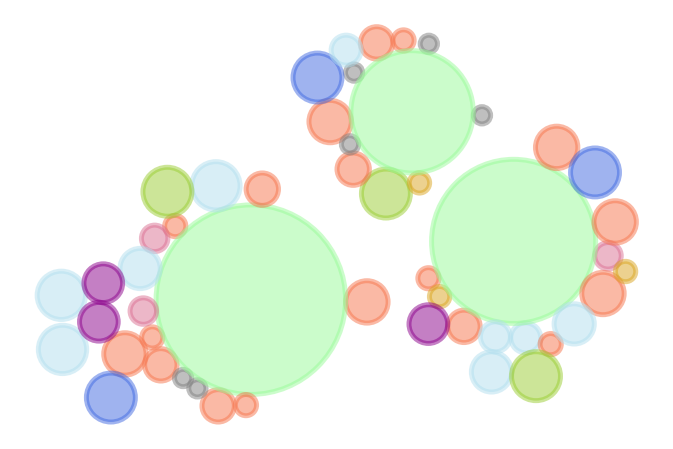

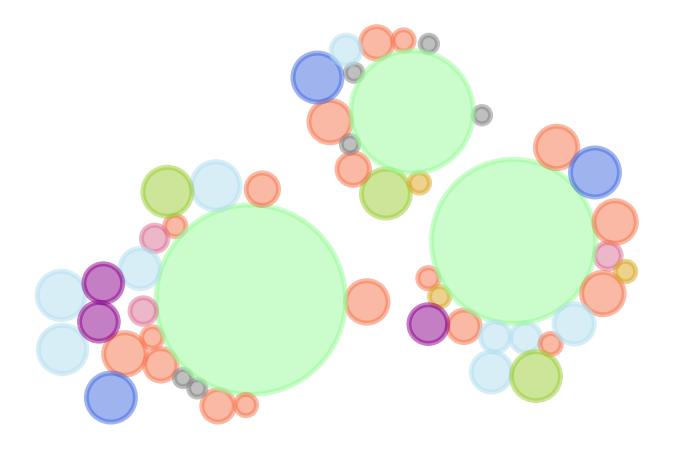

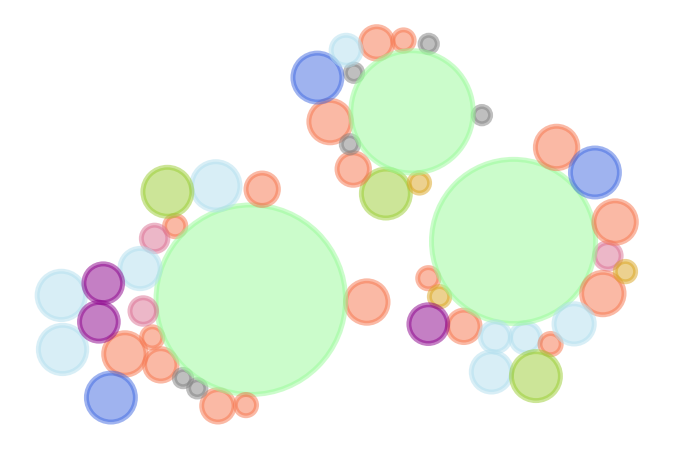

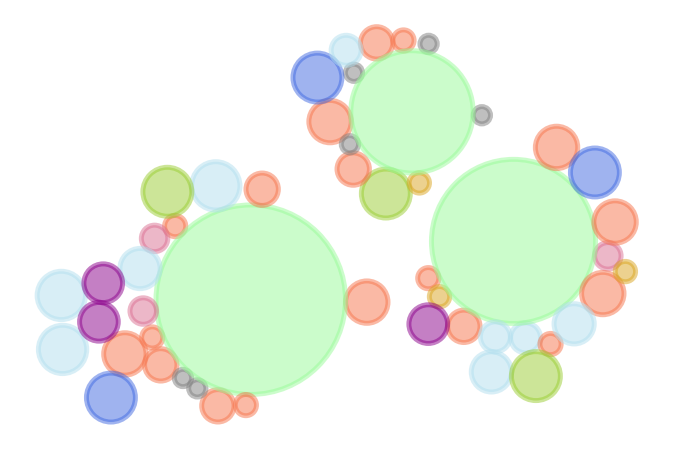

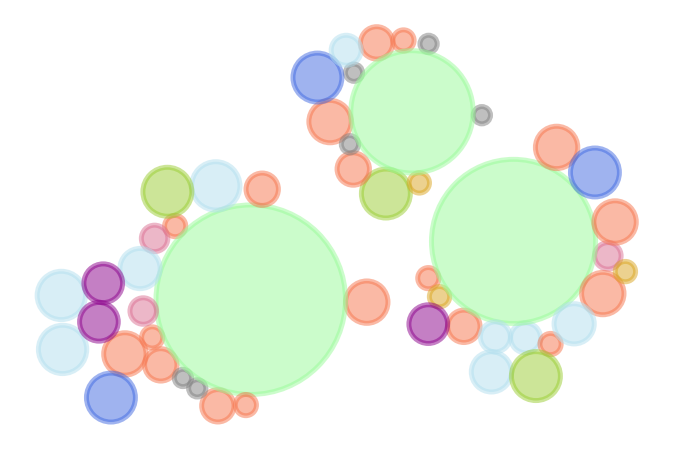

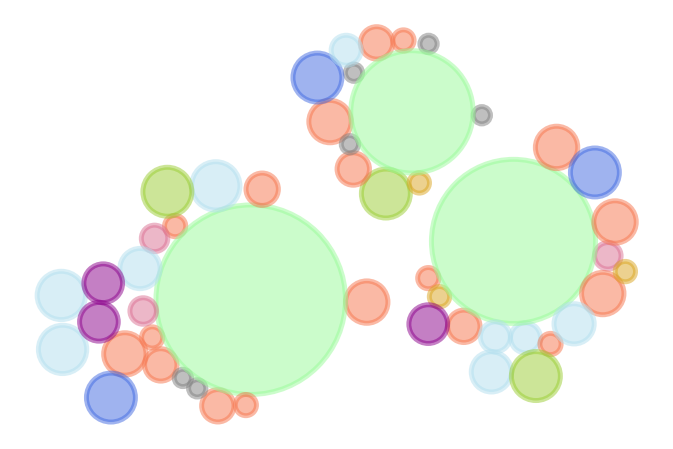

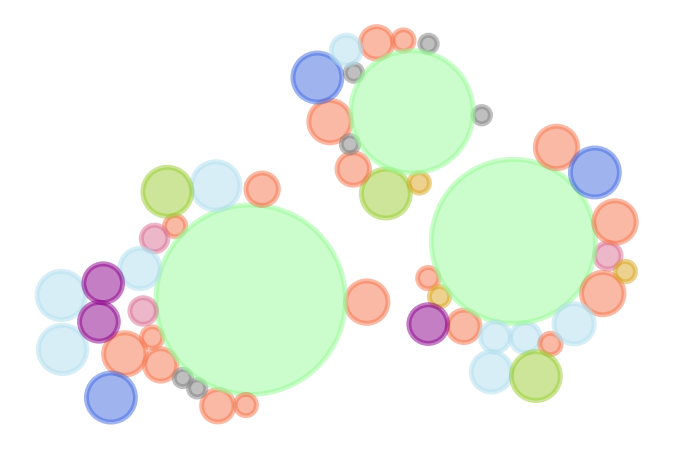

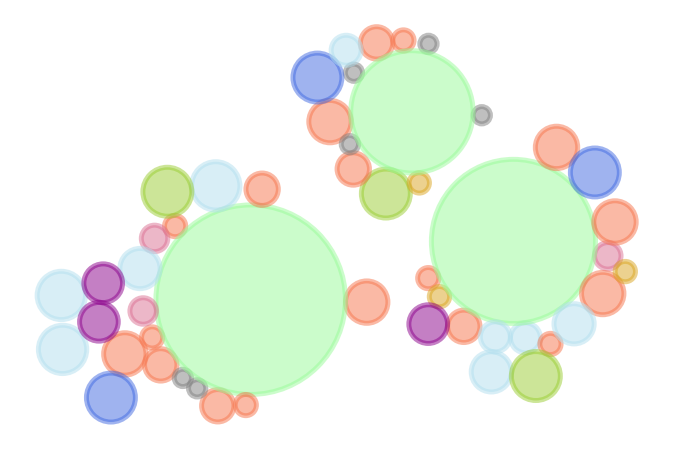

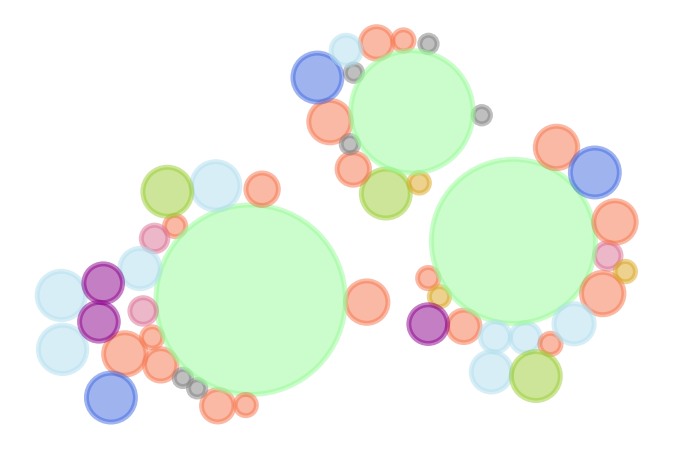

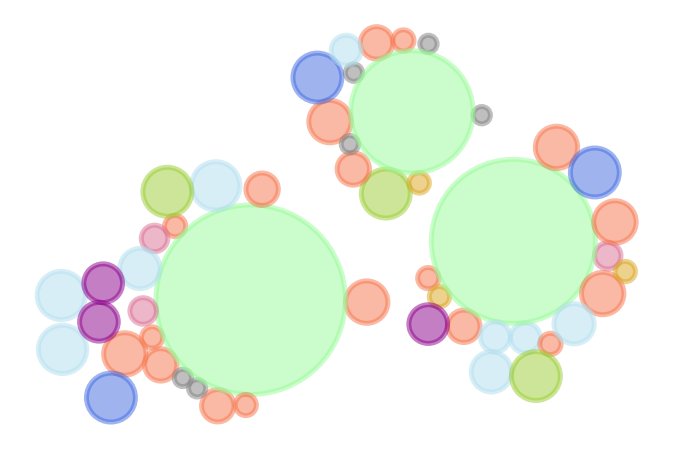

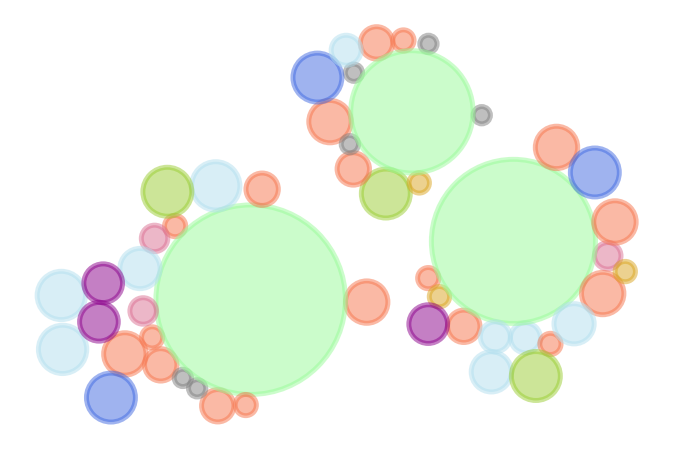

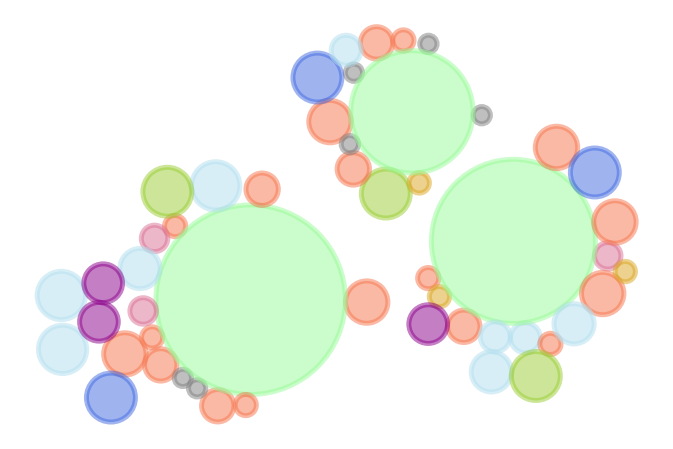

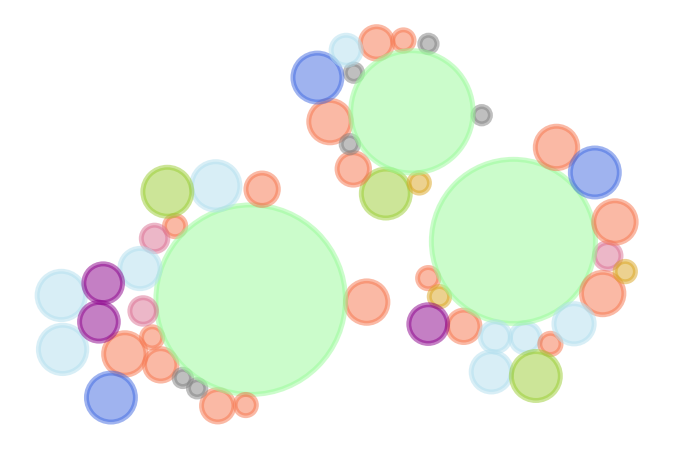

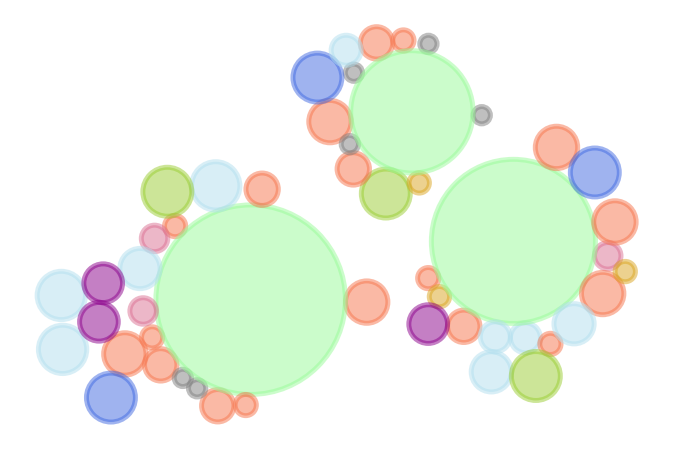

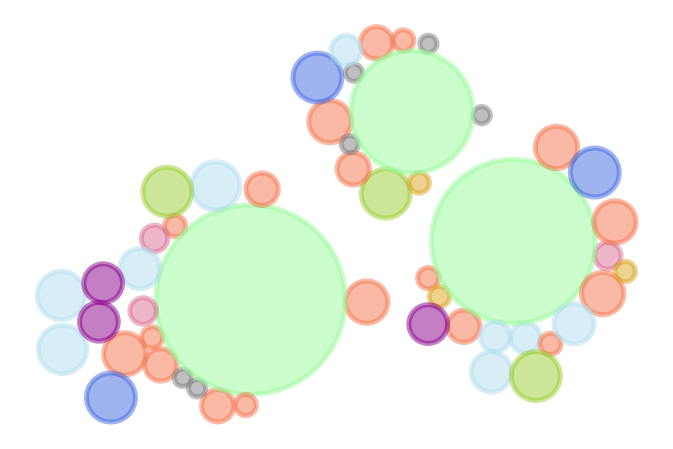

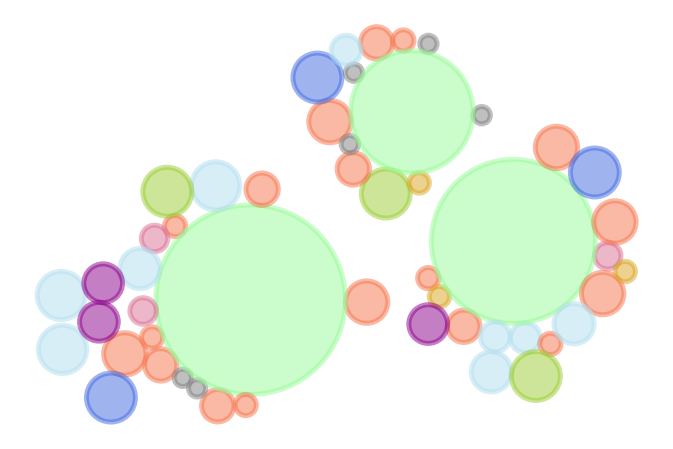

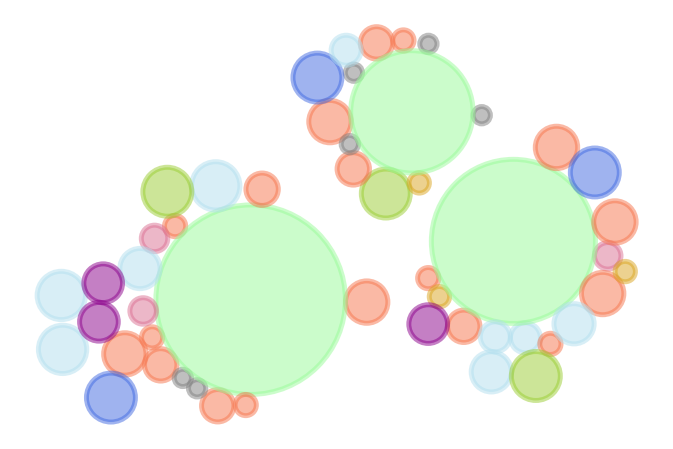

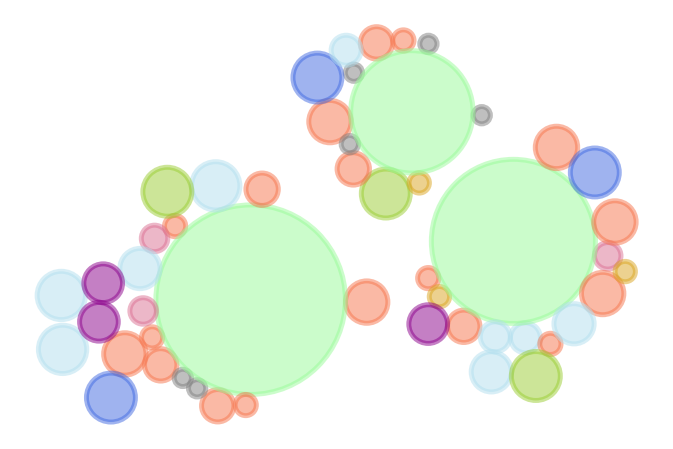

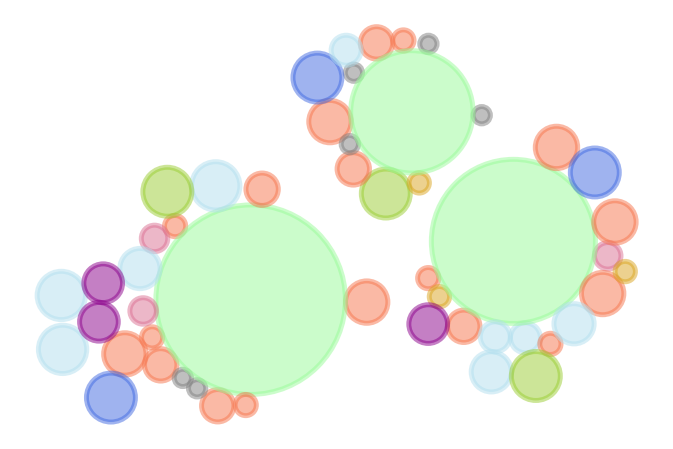

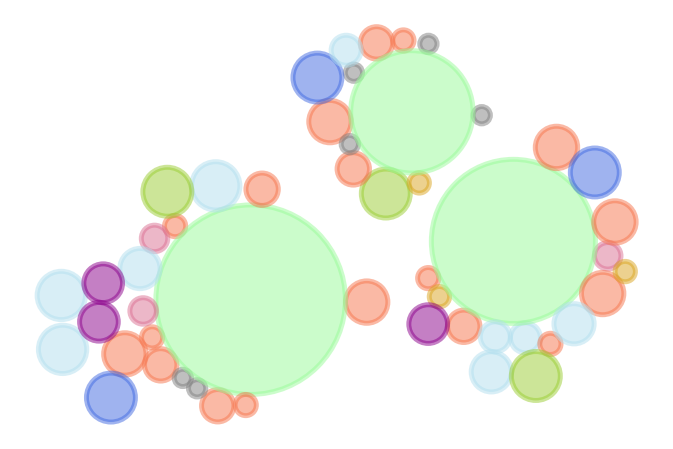

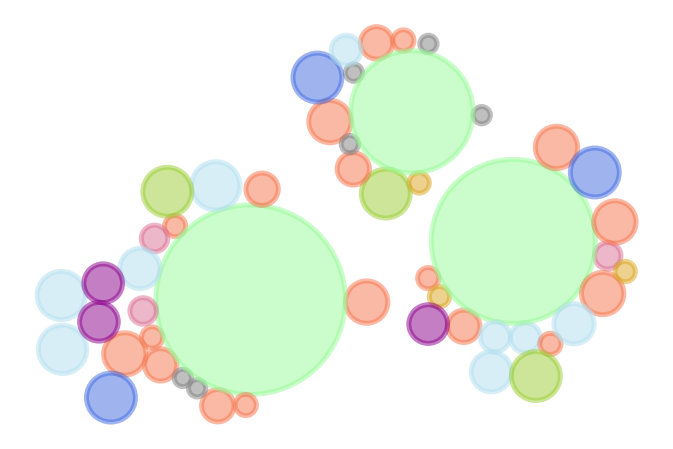

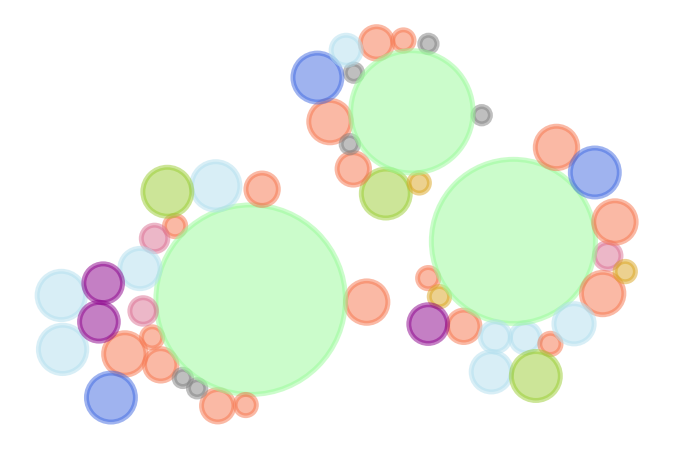

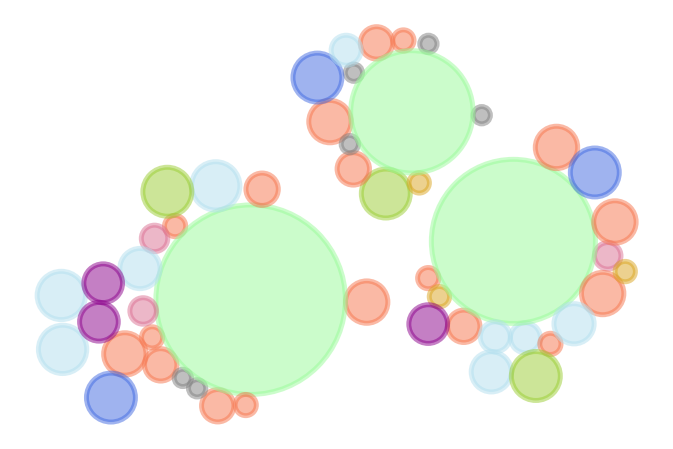

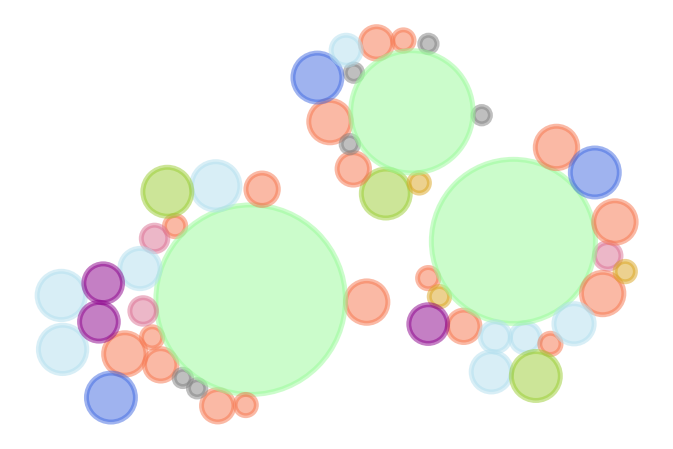

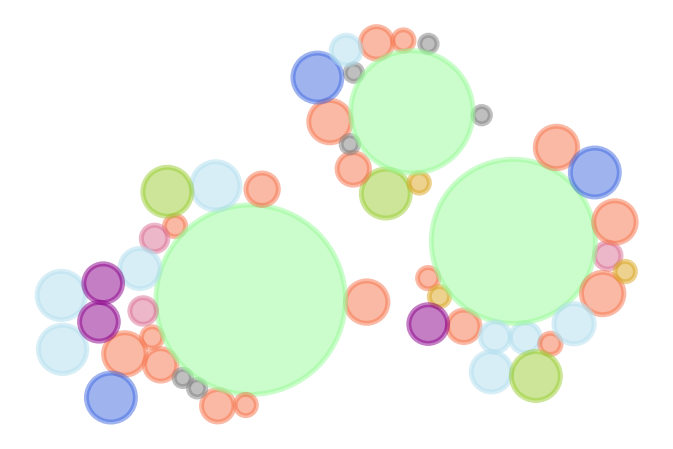

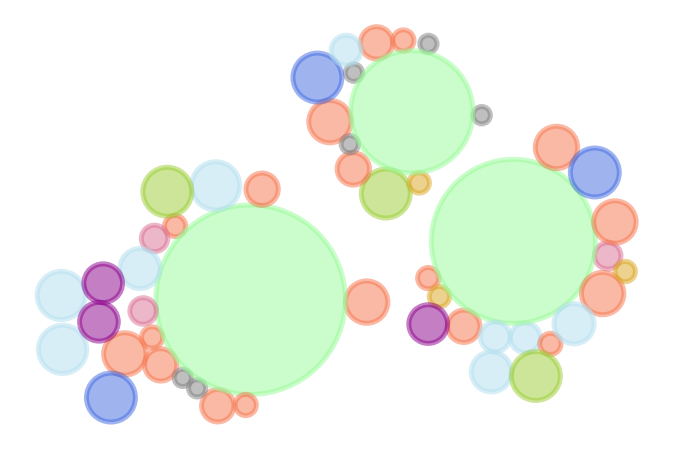

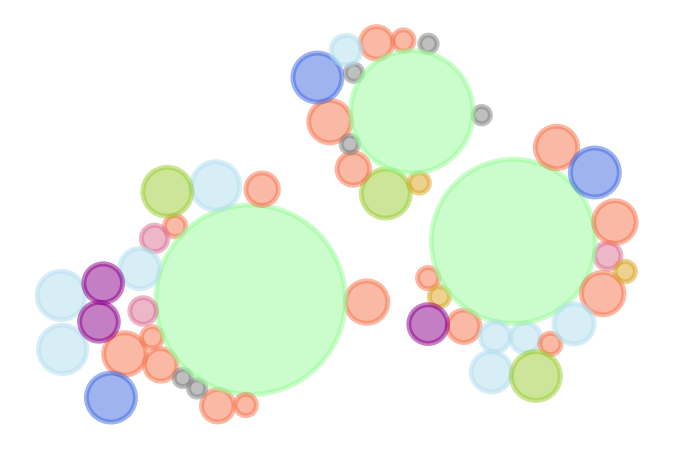

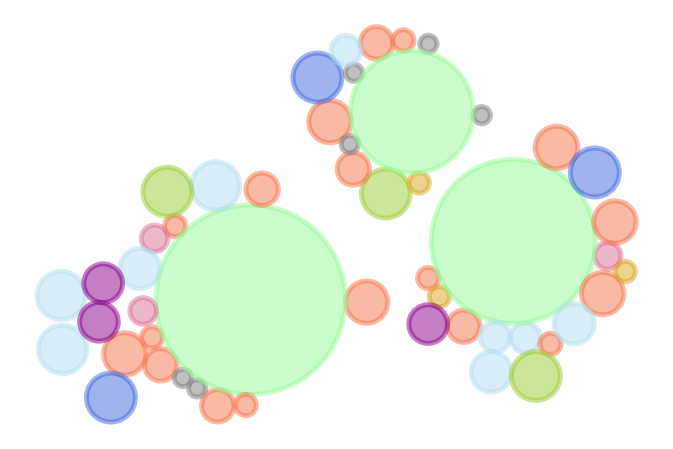

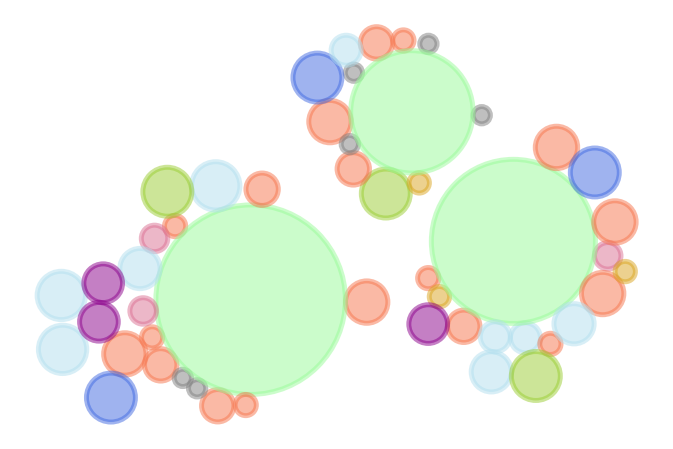

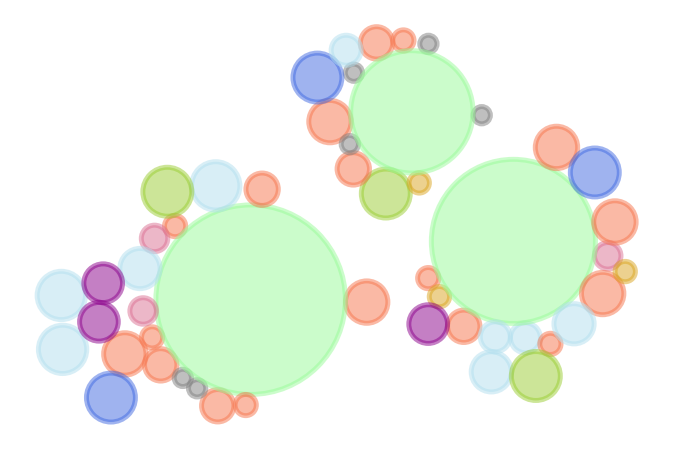

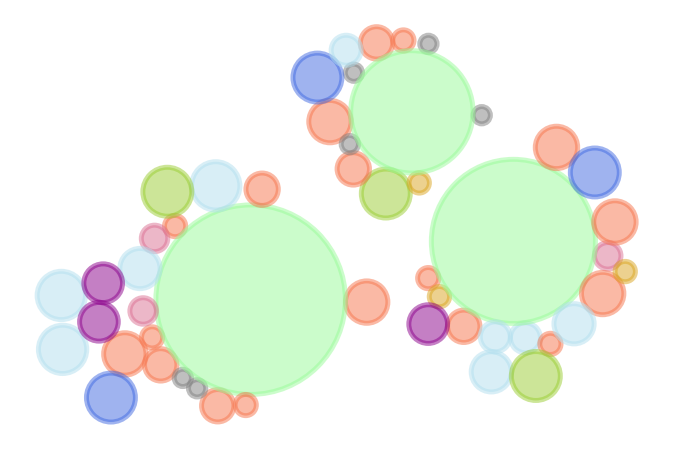

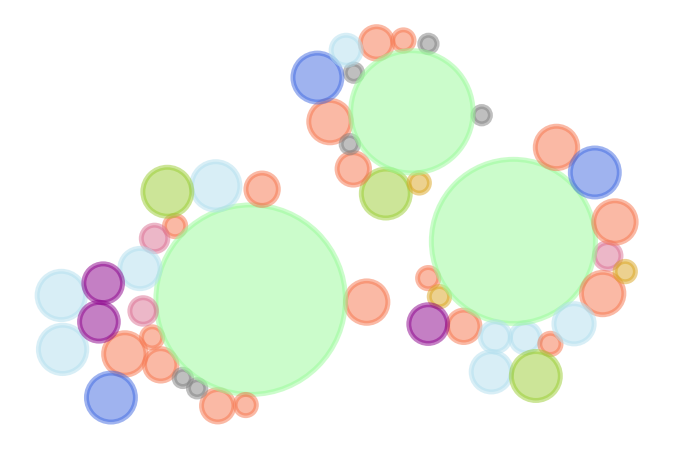

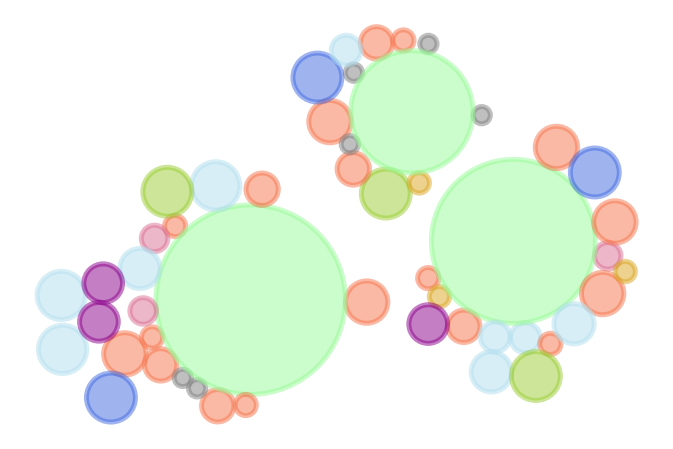

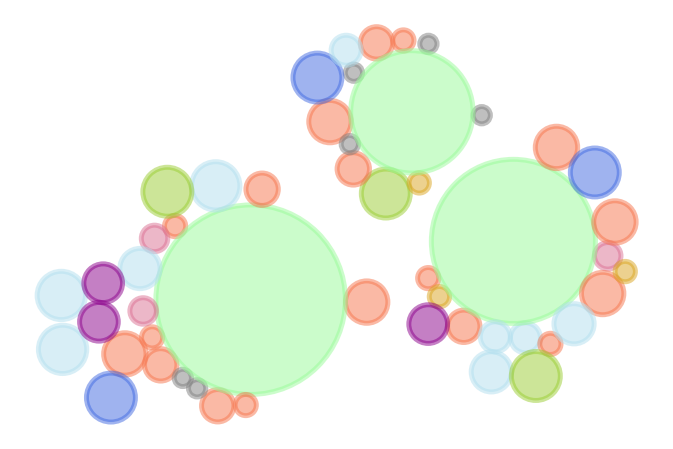

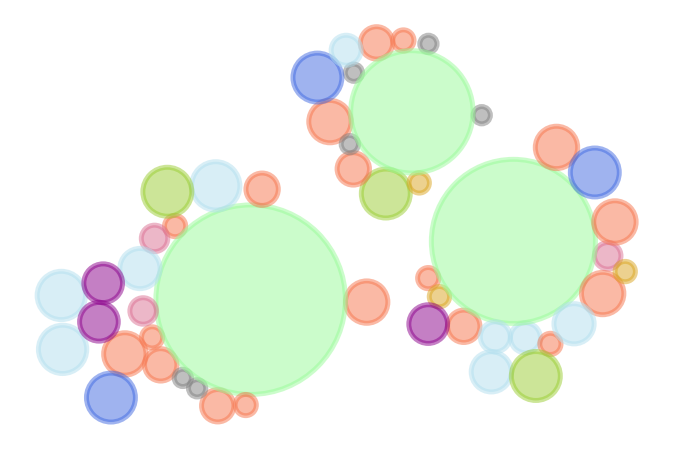

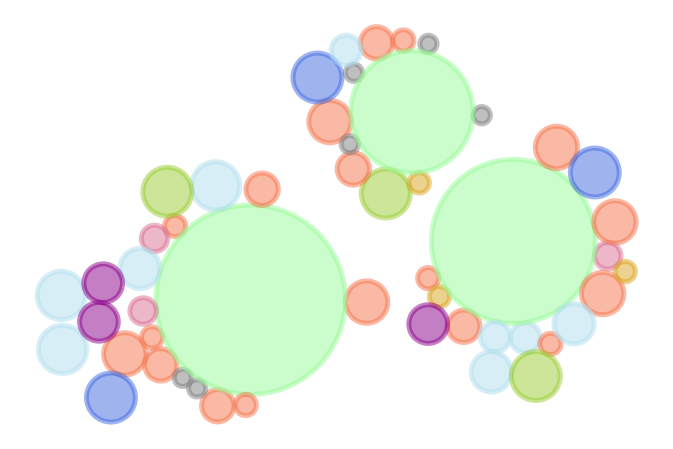

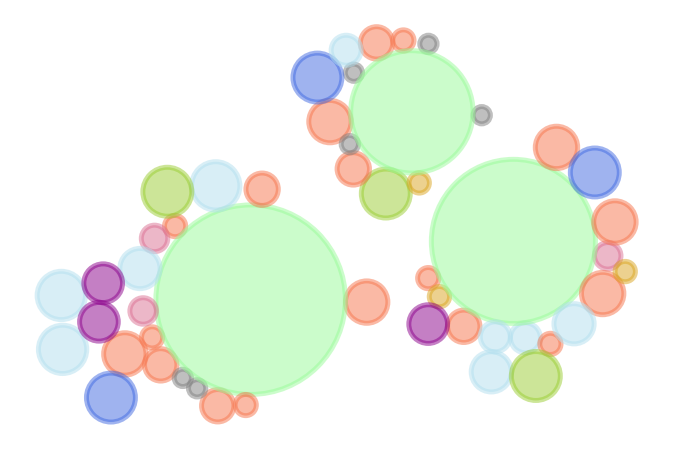

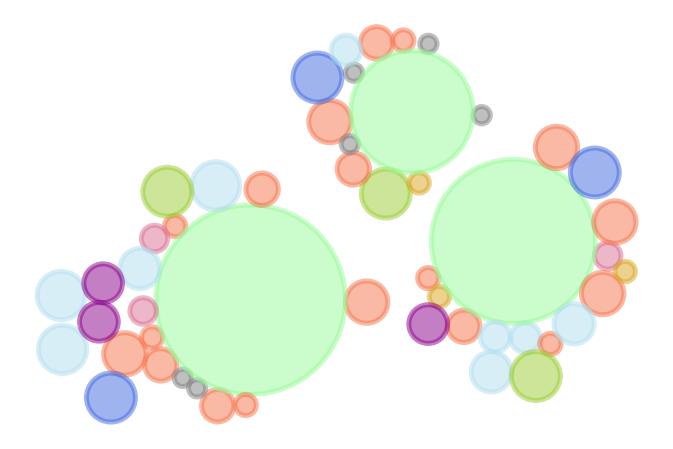

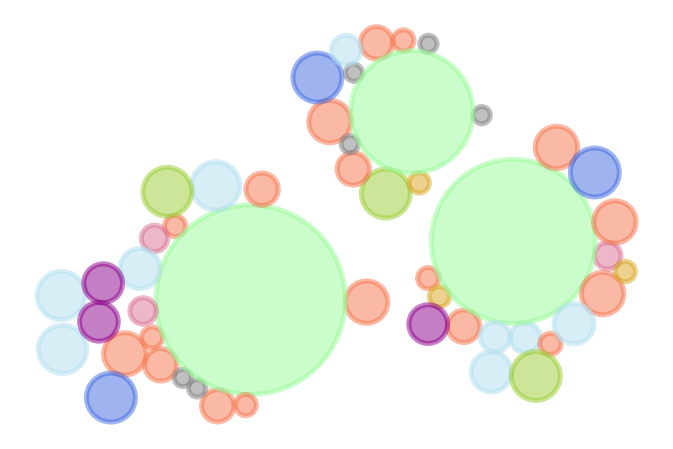

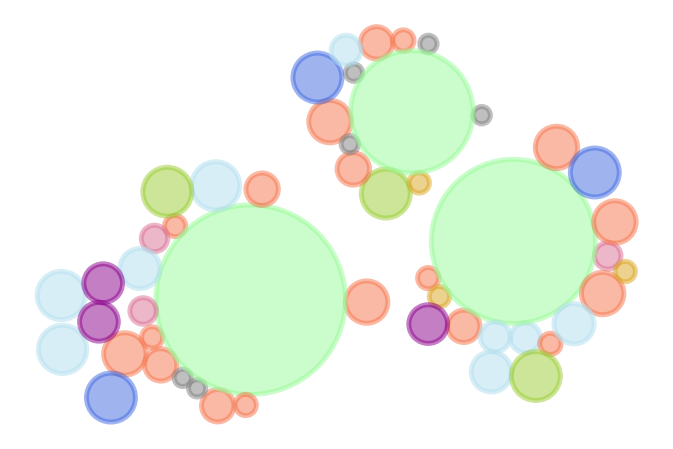

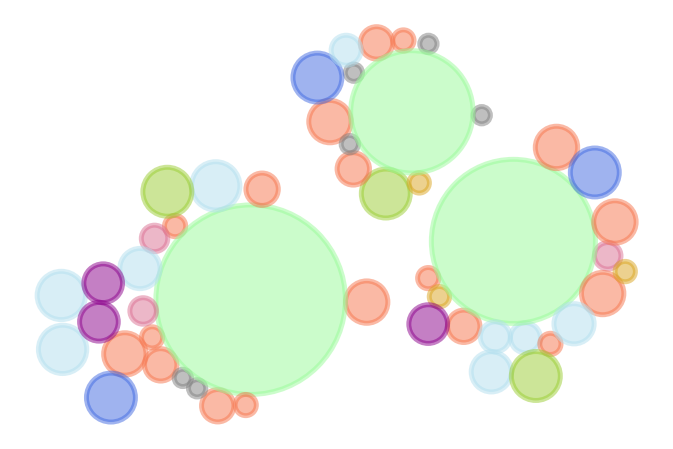

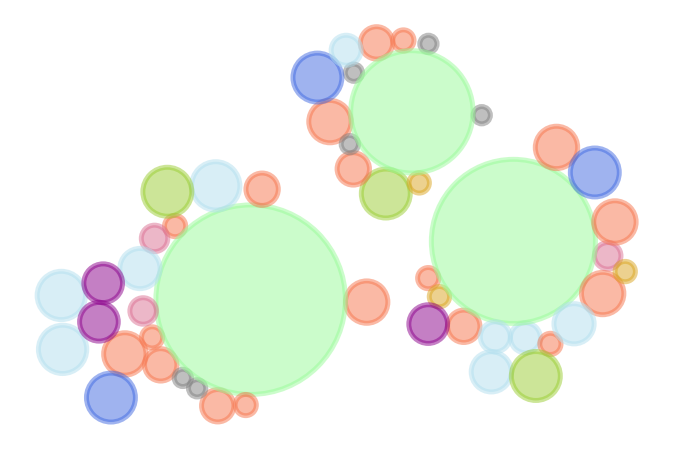

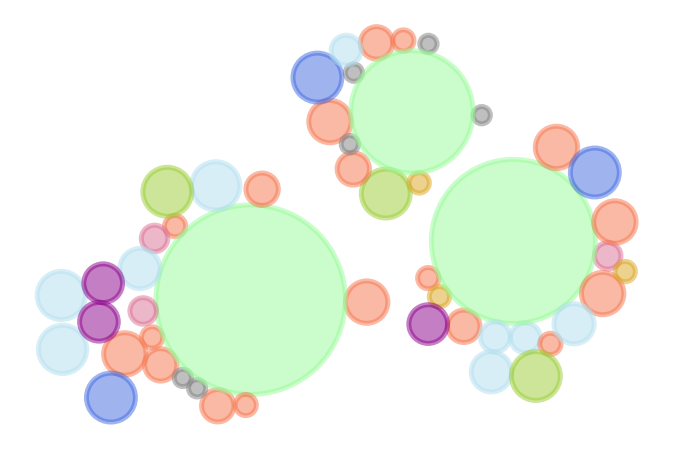

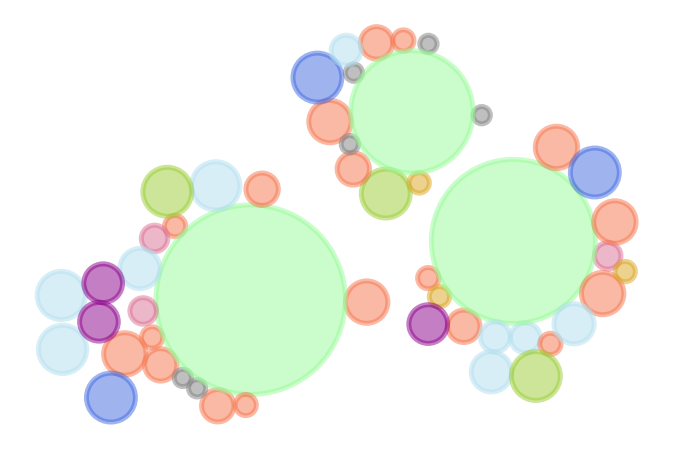

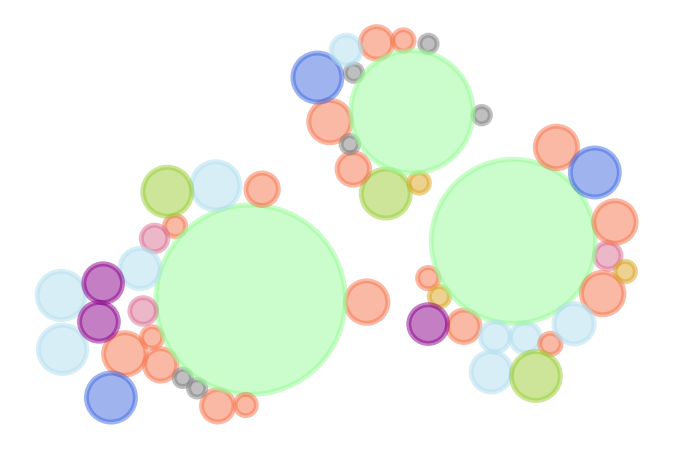

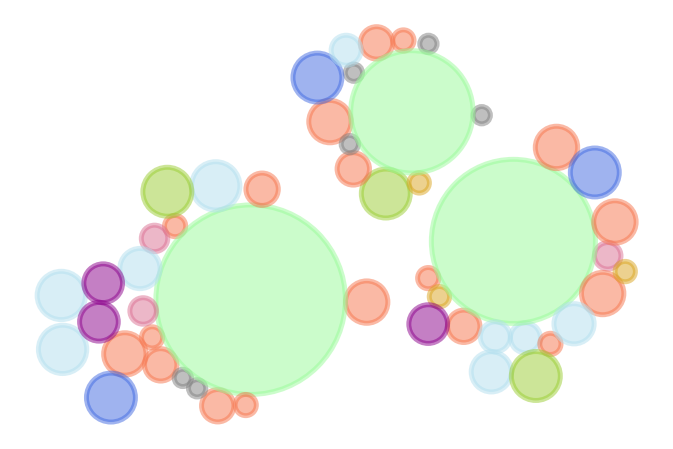

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

land_uses = {
    'land_uses': ['housingS', 'housingM', 'Square', 'housingL', 
                  'officeS','housingS', 'officeM','housingM', 'officeL', 'Square', 'housingL', 
                   'Medical_service',
                  'Restaurants', 'School', 'Supermarket', 'Park', 'Museum',                  
                  'housingS', 'housingM', 'Square', 'housingL', 
                  'officeS','housingS', 'officeM', 'Park', 'housingM', 'officeL', 'Square', 'housingL', 
                    'Medical_service',
                  'Restaurants', 'School', 'Supermarket', 'Museum',
                 'housingS', 'housingM', 'Square', 'housingL', 
                  'officeS','housingS', 'officeM','housingM', 'officeL', 'Square', 'housingL', 
                  'Park', 'Medical_service',
                  'Restaurants', 'School', 'Supermarket', 'Museum'],
    
    'area': [150, 350, 100, 600,
             300, 150, 540, 350, 780, 100, 600,
             800, 138, 800, 234, 9000, 500, 
             150, 350, 100, 600,
             300, 150, 540, 12000, 350, 780, 100, 600,
             800, 138, 800, 234, 500,
             150, 350, 100, 600,
             300, 150, 540, 350, 780, 100, 600,
             5000, 800, 138, 800, 234, 500],
    
    'weight': [200, 200, 100, 200, 
               600, 200, 600, 200, 600, 100, 200,
               800, 800, 800, 800, 10000,  800,
              200, 200, 100, 200, 
               600, 200, 600, 10000, 200, 600, 100, 200,
               800, 800, 800, 800, 800,
              200, 200, 100, 200, 
               600, 200, 600, 200, 600, 100, 200,
               10000, 800, 800, 800, 800, 800],
    
    'color': ['#f6754d', '#f6754d', 'grey', '#f6754d', 
              '#b2dfee', '#f6754d', '#b2dfee', '#f6754d', '#b2dfee', 'grey','#f6754d', 
              'royalblue',
              'goldenrod','yellowgreen','palevioletred', '#98fb98', 'darkmagenta',
              '#f6754d', '#f6754d', 'grey', '#f6754d', 
              '#b2dfee', '#f6754d', '#b2dfee', '#98fb98', '#f6754d', '#b2dfee', 'grey','#f6754d', 
              'royalblue',
              'goldenrod','yellowgreen','palevioletred', 'darkmagenta',
              '#f6754d', '#f6754d', 'grey', '#f6754d', 
              '#b2dfee', '#f6754d', '#b2dfee', '#f6754d', '#b2dfee', 'grey','#f6754d', 
              '#98fb98','royalblue',
              'goldenrod','yellowgreen','palevioletred', 'darkmagenta']
}


class BubbleChart:
    def __init__(self, area, weight, bubble_spacing=0):
        """
        Setup for bubble collapse.

        Parameters
        ---------- 
        area : array-like
            Area of the bubbles.
        bubble_spacing : float, default: 0
            Minimal spacing between bubbles after collapsing.

        Notes
        -----
        If "area" is sorted, the results might look weird.
        """
        area = np.asarray(area)
        weight= np.asarray(weight)
        r = np.sqrt(area / np.pi)

        self.bubble_spacing = bubble_spacing
        self.bubbles = np.ones((len(area), 4))
        self.bubbles[:, 2] = r
        self.bubbles[:, 3] = weight
        self.maxstep = 2 * self.bubbles[:, 2].max() + self.bubble_spacing
        self.step_dist = self.maxstep / 2

        # calculate initial grid layout for bubbles
        length = np.ceil(np.sqrt(len(self.bubbles)))
        grid = np.arange(length) * self.maxstep
        gx, gy = np.meshgrid(grid, grid)
        self.bubbles[:, 0] = gx.flatten()[:len(self.bubbles)]
        #print('x:',self.bubbles[:, 0])
        self.bubbles[:, 1] = gy.flatten()[:len(self.bubbles)]
        #print('y:',self.bubbles[:, 0])

        self.com = self.center_of_mass()

    def center_of_mass(self):
        return np.average(
            self.bubbles[:, :2], axis=0, weights=self.bubbles[:, 3]
        )

    def center_distance(self, bubble, bubbles):
        return np.hypot(bubble[0] - bubbles[:, 0],
                        bubble[1] - bubbles[:, 1])

    def outline_distance(self, bubble, bubbles):
        center_distance = self.center_distance(bubble, bubbles)
        return center_distance - bubble[2] - \
            bubbles[:, 2] - self.bubble_spacing

    def check_collisions(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        return len(distance[distance < 0])

    def collides_with(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        idx_min = np.argmin(distance)
        return idx_min if type(idx_min) == np.ndarray else [idx_min]
    
    def distance(self, bubble, bubble2):
        return np.hypot(bubble[0] - bubble2[0],
                        bubble[1] - bubble2[1])
    
    def nearestPark(self, i):
        min=9999999
        minPark=15
              
        for j in range(len(self.bubbles)):
            if land_uses['land_uses'][j]=='Park' and self.distance(self.bubbles[i],self.bubbles[j])<min:
                min=self.distance(self.bubbles[i],self.bubbles[j])
                minPark=j
        
        return self.bubbles[minPark]
                

    def collapse(self, n_iterations=50):
        
        """
        Move bubbles to the center of mass.

        Parameters
        ----------
        n_iterations : int, default: 50
            Number of moves to perform.
            
        """
        
         #plotea la distribucion inicial
        fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"))



        bubble_chart.plot(
            ax, land_uses['land_uses'], land_uses['color'])
        ax.axis("off")
        ax.relim()
        ax.autoscale_view()
        #ax.set_title('Land uses distribution')

        fig.set_size_inches(15, 8)
        fig.savefig('plots/prueba/gen00.jpg')

        plt.show()
            
        
        for _i in range(n_iterations):
            moves = 0
            
           
            
            #acerca casas a parques
            for i in range(len(self.bubbles)):
                
                if land_uses['land_uses'][i]=='HousingS' or  land_uses['land_uses'][i]=='housingM' or land_uses['land_uses'][i]=='Square' or land_uses['land_uses'][i]=='housingL':
                    
                    self.com=self.nearestPark(i)[:2]
                    #print('park:', self.com)
                    
                    rest_bub = np.delete(self.bubbles, i, 0)
                    # try to move directly towards the center of mass
                    # direction vector from bubble to the center of the park
                    dir_vec = self.com - self.bubbles[i, :2]

                    # shorten direction vector to have length of 1
                    dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))

                    # calculate new bubble position
                    new_point = self.bubbles[i, :2] + dir_vec * self.step_dist
                    new_bubble = np.append(new_point, self.bubbles[i, 2:4])

                    # check whether new bubble collides with other bubbles
                    if not self.check_collisions(new_bubble, rest_bub):
                        self.bubbles[i, :] = new_bubble
                        self.com = self.center_of_mass()
                        moves += 1
                    else:
                        # try to move around a bubble that you collide with
                        # find colliding bubble
                        for colliding in self.collides_with(new_bubble, rest_bub):
                            # calculate direction vector
                            dir_vec = rest_bub[colliding, :2] - self.bubbles[i, :2]
                            dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))
                            # calculate orthogonal vector
                            orth = np.array([dir_vec[1], -dir_vec[0]])
                            # test which direction to go
                            new_point1 = (self.bubbles[i, :2] + orth *
                                          self.step_dist)
                            new_point2 = (self.bubbles[i, :2] - orth *
                                          self.step_dist)
                            dist1 = self.center_distance(
                                self.com, np.array([new_point1]))
                            dist2 = self.center_distance(
                                self.com, np.array([new_point2]))
                            new_point = new_point1 if dist1 < dist2 else new_point2
                            new_bubble = np.append(new_point, self.bubbles[i, 2:4])
                            if not self.check_collisions(new_bubble, rest_bub):
                                self.bubbles[i, :] = new_bubble
                                self.com = self.center_of_mass()
                            
            #acerca todo a parques
            for i in range(len(self.bubbles)):
                
                               
                if land_uses['land_uses'][i]!='Park':
                    
                    if i==16:
                        self.com=self.bubbles[15,:2]
                    else:
                        self.com=self.nearestPark(i)[:2]
                        
                    #print('park:', self.com)
                    
                    rest_bub = np.delete(self.bubbles, i, 0)
                    # try to move directly towards the center of mass
                    # direction vector from bubble to the center of the park
                    dir_vec = self.com - self.bubbles[i, :2]

                    # shorten direction vector to have length of 1
                    dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))

                    # calculate new bubble position
                    new_point = self.bubbles[i, :2] + dir_vec * self.step_dist
                    new_bubble = np.append(new_point, self.bubbles[i, 2:4])

                    # check whether new bubble collides with other bubbles
                    if not self.check_collisions(new_bubble, rest_bub):
                        self.bubbles[i, :] = new_bubble
                        self.com = self.center_of_mass()
                        moves += 1
                    else:
                        # try to move around a bubble that you collide with
                        # find colliding bubble
                        for colliding in self.collides_with(new_bubble, rest_bub):
                            # calculate direction vector
                            dir_vec = rest_bub[colliding, :2] - self.bubbles[i, :2]
                            dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))
                            # calculate orthogonal vector
                            orth = np.array([dir_vec[1], -dir_vec[0]])
                            # test which direction to go
                            new_point1 = (self.bubbles[i, :2] + orth *
                                          self.step_dist)
                            new_point2 = (self.bubbles[i, :2] - orth *
                                          self.step_dist)
                            dist1 = self.center_distance(
                                self.com, np.array([new_point1]))
                            dist2 = self.center_distance(
                                self.com, np.array([new_point2]))
                            new_point = new_point1 if dist1 < dist2 else new_point2
                            new_bubble = np.append(new_point, self.bubbles[i, 2:4])
                            if not self.check_collisions(new_bubble, rest_bub):
                                self.bubbles[i, :] = new_bubble
                                self.com = self.center_of_mass()
                
                #muevo los parques hacia el centro de gravedad
                elif _i<30:
                    self.com = self.center_of_mass()
                    print(self.com)
                    
                    rest_bub = np.delete(self.bubbles, i, 0)
                    # try to move directly towards the center of mass
                    # direction vector from bubble to the center of the park
                    dir_vec = self.com - self.bubbles[i, :2]

                    # shorten direction vector to have length of 1
                    dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))

                    # calculate new bubble position
                    new_point = self.bubbles[i, :2] + dir_vec * self.step_dist
                    new_bubble = np.append(new_point, self.bubbles[i, 2:4])

                    # check whether new bubble collides with other bubbles
                    if not self.check_collisions(new_bubble, rest_bub):
                        self.bubbles[i, :] = new_bubble
                        self.com = self.center_of_mass()
                        moves += 1
                    else:
                        # try to move around a bubble that you collide with
                        # find colliding bubble
                        for colliding in self.collides_with(new_bubble, rest_bub):
                            # calculate direction vector
                            dir_vec = rest_bub[colliding, :2] - self.bubbles[i, :2]
                            dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))
                            # calculate orthogonal vector
                            orth = np.array([dir_vec[1], -dir_vec[0]])
                            # test which direction to go
                            new_point1 = (self.bubbles[i, :2] + orth *
                                          self.step_dist)
                            new_point2 = (self.bubbles[i, :2] - orth *
                                          self.step_dist)
                            dist1 = self.center_distance(
                                self.com, np.array([new_point1]))
                            dist2 = self.center_distance(
                                self.com, np.array([new_point2]))
                            new_point = new_point1 if dist1 < dist2 else new_point2
                            new_bubble = np.append(new_point, self.bubbles[i, 2:4])
                            if not self.check_collisions(new_bubble, rest_bub):
                                self.bubbles[i, :] = new_bubble
                                self.com = self.center_of_mass()
                   
            fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"))



            bubble_chart.plot(
                ax, land_uses['land_uses'], land_uses['color'])
            ax.axis("off")
            ax.relim()
            ax.autoscale_view()
            #ax.set_title('Land uses distribution')

            fig.set_size_inches(15, 8)
            fig.savefig('plots/prueba/gen%d_%d.jpg' %(_i, i))

            plt.show()

            if moves / len(self.bubbles) < 0.1:
                self.step_dist = self.step_dist / 2

    def plot(self, ax, labels, colors):
        """
        Draw the bubble plot.

        Parameters
        ----------
        ax : matplotlib.axes.Axes
        labels : list
            Labels of the bubbles.
        colors : list
            Colors of the bubbles.
        """
        #color legend 
        """
        legend_elements = [Patch(color='#f6754d', alpha=0.5, linewidth=1, label='Housing'),
                          Patch(color='#b2dfee', alpha=0.5, linewidth=1, label='Offices'),
                          Patch(color='grey', alpha=0.5, linewidth=1, label='Squares')]
        
        for i in range(11, len(colors)):
            legend_elements.append(Patch( color=colors[i], 
                                               alpha=0.5, linewidth=1, label=labels[i]))
        
        ax.legend(bbox_to_anchor=(-0.2, 1), borderaxespad=0, loc='upper left', handles=legend_elements)
        """
        #draw the bubbles        
        for i in range(len(self.bubbles)):
            circ = plt.Circle(
                self.bubbles[i, :2], self.bubbles[i, 2], color=colors[i], alpha=0.5, linewidth=5)
            ax.add_patch(circ)
            #ax.text(*self.bubbles[i, :2], labels[i], horizontalalignment='center', verticalalignment='center')


bubble_chart = BubbleChart(area=land_uses['area'],weight= land_uses['weight'], bubble_spacing=0.1)

bubble_chart.collapse(100)



In [28]:

from PIL import Image
import glob
 
# Create the frames
frames = []
imgs = glob.glob("plots/*.jpg")
for i in imgs:
    new_frame = Image.open(i)
    frames.append(new_frame)
 
# Save into a GIF file that loops forever
frames[0].save('plots/pruebaX.gif', format='GIF',
               append_images=frames[1:],
               save_all=True,
               duration=300, loop=1)


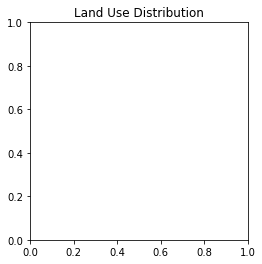

In [12]:

from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"))
bubble_chart = BubbleChart(area=land_uses['area'],weight= land_uses['weight'], bubble_spacing=0.1)

def animation_function(j):
    moves = 0
    for i in range(len(bubble_chart.bubbles)):
        rest_bub = np.delete(bubble_chart.bubbles, i, 0)
        # try to move directly towards the center of mass
        # direction vector from bubble to the center of mass
        dir_vec = bubble_chart.com - bubble_chart.bubbles[i, :2]

        # shorten direction vector to have length of 1
        dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))

        # calculate new bubble position
        new_point = bubble_chart.bubbles[i, :2] + dir_vec * bubble_chart.step_dist
        new_bubble = np.append(new_point, bubble_chart.bubbles[i, 2:4])

        # check whether new bubble collides with other bubbles
        if not bubble_chart.check_collisions(new_bubble, rest_bub):
            bubble_chart.bubbles[i, :] = new_bubble
            bubble_chart.com = bubble_chart.center_of_mass()
            moves += 1
        else:
            # try to move around a bubble that you collide with
            # find colliding bubble
            for colliding in bubble_chart.collides_with(new_bubble, rest_bub):
                # calculate direction vector
                dir_vec = rest_bub[colliding, :2] - bubble_chart.bubbles[i, :2]
                dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))
                # calculate orthogonal vector
                orth = np.array([dir_vec[1], -dir_vec[0]])
                # test which direction to go
                new_point1 = (bubble_chart.bubbles[i, :2] + orth *
                              bubble_chart.step_dist)
                new_point2 = (bubble_chart.bubbles[i, :2] - orth *
                              bubble_chart.step_dist)
                dist1 = bubble_chart.center_distance(
                    bubble_chart.com, np.array([new_point1]))
                dist2 = bubble_chart.center_distance(
                    bubble_chart.com, np.array([new_point2]))
                new_point = new_point1 if dist1 < dist2 else new_point2
                new_bubble = np.append(new_point, bubble_chart.bubbles[i, 2:4])
                if not bubble_chart.check_collisions(new_bubble, rest_bub):
                    bubble_chart.bubbles[i, :] = new_bubble
                    bubble_chart.com = bubble_chart.center_of_mass()

        fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"))
        bubble_chart.plot(
            ax, land_uses['land_uses'], land_uses['color'])
        ax.axis("off")
        ax.relim()
        ax.autoscale_view()
        ax.set_title('Land uses distribution')


    if moves / len(bubble_chart.bubbles) < 0.1:
        bubble_chart.step_dist = bubble_chart.step_dist / 2
    
  



plt.title("Land Use Distribution")

animation = FuncAnimation(fig,
                          func = animation_function,
                          frames = np.arange(0, 10, 0.1), 
                          interval = 10)
plt.show()